In [12]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [206]:
reviews = pd.read_csv('data/dataset.csv', encoding='utf8')

In [207]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102692 entries, 0 to 102691
Data columns (total 6 columns):
app       102692 non-null object
_id       102692 non-null object
date      102692 non-null object
rate      102692 non-null int64
review    102692 non-null object
user      102692 non-null object
dtypes: int64(1), object(5)
memory usage: 4.7+ MB


In [8]:
#reviews = reviews.drop('_id', axis=1)

In [208]:
reviews.tail()

app                       _id           date  rate  \
102687    SmiRing  5a2ab22e8abf5a3f6f3b1138  2012년 12월 10일     5   
102688    SmiRing  5a2ab22e8abf5a3f6f3b1139   2015년 8월 26일     1   
102689    SmiRing  5a2ab22e8abf5a3f6f3b113a   2013년 1월 19일     5   
102690      마미새미   5a2ab23d8abf5a3f6f3b113b    2017년 5월 5일     5   
102691      마미새미   5a2ab23d8abf5a3f6f3b113d    2017년 9월 1일     5   

                                                  review        user  
102687           신기해요 와~신기해요...근대 어떻게 이런 평범한 소릴듣고 잠을 자지?        정윤지   
102688  앙 전혀 효과 못봄 아기가 들을수록 난감하게 울어대요 이걸 막 던져가주구 이걸 지웟어용         리릴   
102689                               수중+고동이젤조아요잘때 잠자기조은소        이효배   
102690                                        무료수업 듣고싶어요   붐3 Boom3   
102691                                          진석이 코 개큼         영채

In [209]:
reviews['review length'] = reviews['review'].apply(len)
reviews.groupby('rate')['review length'].mean()

rate
1    61.976958
2    65.300796
3    63.882243
4    61.172669
5    50.785200
Name: review length, dtype: float64

In [210]:
reviews.groupby('review length').count()

app   _id  date  rate  review  user
review length                                      
1                16    16    16    16      16    16
2               324   324   324   324     324   324
3               558   558   558   558     558   558
4               747   747   747   747     747   747
5               985   985   985   985     985   985
6              1472  1472  1472  1472    1472  1472
7              1591  1591  1591  1591    1591  1591
8              1659  1659  1659  1659    1659  1659
9              1700  1700  1700  1700    1700  1700
10             1652  1652  1652  1652    1652  1652
11             1706  1706  1706  1706    1706  1706
12             1805  1805  1805  1805    1805  1805
13             1682  1682  1682  1682    1682  1682
14             1616  1616  1616  1616    1616  1616
15             1667  1667  1667  1667    1667  1667
16             1642  1642  1642  1642    1642  1642
17             1650  1650  1650  1650    1650  1650
18             1568  1568  1568  1568    1568  1568
19             1571  1571  1571  1571    1571  1571
20             1527  1527  1527  1527    1527  1527
21             1517  1517  1517  1517    1517  1517
22             1431  1431  1431  1431    1431  1431
23             1385  1385  1385  1385    1385  1385
24             1312  1312  1312  1312    1312  1312
25             1314  1314  1314  1314    1314  1314
26             1267  1267  1267  1267    1267  1267
27             1223  1223  1223  1223    1223  1223
28             1224  1224  1224  1224    1224  1224
29             1261  1261  1261  1261    1261  1261
30             1212  1212  1212  1212    1212  1212
...             ...   ...   ...   ...     ...   ...
742               1     1     1     1       1     1
754               1     1     1     1       1     1
761               1     1     1     1       1     1
820               1     1     1     1       1     1
839               1     1     1     1       1     1
862               1     1     1     1       1     1
863               1     1     1     1       1     1
869               1     1     1     1       1     1
883               1     1     1     1       1     1
888               1     1     1     1       1     1
897               1     1     1     1       1     1
910               1     1     1     1       1     1
918               1     1     1     1       1     1
933               1     1     1     1       1     1
935               1     1     1     1       1     1
954               1     1     1     1       1     1
966               1     1     1     1       1     1
993               1     1     1     1       1     1
997               1     1     1     1       1     1
1010              2     2     2     2       2     2
1023              1     1     1     1       1     1
1054              1     1     1     1       1     1
1060              1     1     1     1       1     1
1086              1     1     1     1       1     1
1104              1     1     1     1       1     1
1111              1     1     1     1       1     1
1162              1     1     1     1       1     1
1165              1     1     1     1       1     1
1186              1     1     1     1       1     1
1201              1     1     1     1       1     1

[583 rows x 6 columns]

In [212]:
reviews[reviews['review length'] == 0].groupby('rate').count()

Empty DataFrame
Columns: [app, _id, date, review, user, review length]
Index: []

In [211]:
# length 1은 삭제 대상
reviews[reviews['review length'] == 5]

app                       _id           date  \
262                  Goldeness브라우저  5a2933858abf5ad2ff5dc92a   2017년 12월 1일   
267                  Goldeness브라우저  5a2933858abf5ad2ff5dc92f  2017년 11월 30일   
269                  Goldeness브라우저  5a2933858abf5ad2ff5dc931  2017년 11월 28일   
317       롯데홈쇼핑 LOTTE Homeshopping  5a2933858abf5ad2ff5dc961  2017년 11월 25일   
513                  APUS Browser   5a2933858abf5ad2ff5dca25  2017년 11월 16일   
689                   Ace Browser   5a2933858abf5ad2ff5dcad5  2017년 11월 26일   
694                   Ace Browser   5a2933858abf5ad2ff5dcada  2017년 11월 29일   
704                   Ace Browser   5a2933858abf5ad2ff5dcae4  2017년 11월 29일   
705                   Ace Browser   5a2933858abf5ad2ff5dcae5  2017년 11월 27일   
740                            T인증  5a2933858abf5ad2ff5dcb08  2017년 11월 21일   
854                         네이버 지도  5a2933858abf5ad2ff5dcb7a  2017년 11월 30일   
856                         네이버 지도  5a2933858abf5ad2ff5dcb7c   2017년 12월 1일   
890                            다음   5a2933858abf5ad2ff5dcb9e  2017년 11월 22일   
950                           코레일톡  5a2933858abf5ad2ff5dcbda  2017년 11월 28일   
1182                  Alarm Clock   5a2933868abf5ad2ff5dccc2  2017년 11월 26일   
1197                  Alarm Clock   5a2933868abf5ad2ff5dccd1  2017년 11월 28일   
1199                  Alarm Clock   5a2933868abf5ad2ff5dccd3   2017년 12월 1일   
1201                  Alarm Clock   5a2933868abf5ad2ff5dccd5  2017년 11월 26일   
1767                         카카오내비  5a2933868abf5ad2ff5dcf0b   2017년 12월 1일   
1768                         카카오내비  5a2933868abf5ad2ff5dcf0c   2017년 12월 2일   
1780             Minifier Browser   5a2933868abf5ad2ff5dcf18  2017년 11월 20일   
1787             Minifier Browser   5a2933868abf5ad2ff5dcf1f  2017년 11월 15일   
1793             Minifier Browser   5a2933868abf5ad2ff5dcf25  2017년 11월 17일   
1795             Minifier Browser   5a2933868abf5ad2ff5dcf27   2017년 7월 23일   
1941                      CastBox   5a2933868abf5ad2ff5dcfb9  2017년 11월 15일   
1953                      CastBox   5a2933868abf5ad2ff5dcfc5  2017년 11월 23일   
1985                위비톡 WiBee Talk  5a2933868abf5ad2ff5dcfe5  2017년 11월 26일   
2209                         배달의민족  5a2933868abf5ad2ff5dd0c5   2017년 12월 2일   
2291                      킬러를 찾아라   5a2933868abf5ad2ff5dd117   2017년 12월 2일   
2331                         iHerb  5a2933868abf5ad2ff5dd13f  2017년 11월 30일   
...                            ...                       ...            ...   
98885                     고속도로여행정보  5a2aaca28abf5a3f6f3b015c  2016년 10월 23일   
98914                         오토콜링  5a2aacb38abf5a3f6f3b017e  2017년 11월 14일   
99046                      갓차 멤버스   5a2aacd38abf5a3f6f3b0208   2016년 9월 14일   
99062                   DAG3 setup  5a2aacde8abf5a3f6f3b0218  2017년 11월 30일   
99097                      ChargEV  5a2aace38abf5a3f6f3b0241    2017년 2월 9일   
99329                       Fuelio  5a2aad208abf5a3f6f3b0338   2015년 6월 20일   
99442                    중고차 시세계산기  5a2aad368abf5a3f6f3b03b1   2015년 10월 7일   
99545                      자동운행기록계  5a2aad558abf5a3f6f3b041e  2016년 10월 10일   
99647                자동차의 속도계 및 소리  5a2aad768abf5a3f6f3b048c    2015년 8월 5일   
99656                자동차의 속도계 및 소리  5a2aad778abf5a3f6f3b0498   2014년 11월 3일   
99662                         카노트   5a2aad7c8abf5a3f6f3b049e   2017년 6월 28일   
99783                     나를위한대리운전  5a2aad9f8abf5a3f6f3b051d  2016년 10월 24일   
99917            Car Launcher FREE  5a2aadc68abf5a3f6f3b05ad    2016년 8월 3일   
99924                     카카오 통근버스  5a2aadcc8abf5a3f6f3b05b8    2017년 4월 6일   
100033                      전기차충전소  5a2aae218abf5a3f6f3b0634   2017년 3월 12일   
100118         Car 3D Configurator  5a2aae578abf5a3f6f3b0690  2017년 10월 12일   
100212          Ulysse Speedometer  5a2aae868abf5a3f6f3b06f3    2012년 8월 3일   
100418                      베이비스토리  5a2aafb58abf5a3f6f3b07cb  2017년 11월 19일   
100811              현대해상 굿앤굿 어린이케어  5a2aafe58abf5a3f6f3b0965    2017년 4월 6일   
10

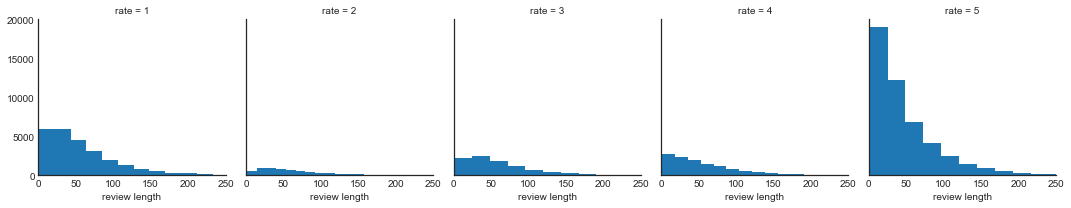

In [122]:
sns.set_style('white')

g = sns.FacetGrid(reviews, col='rate')
g.map(plt.hist, 'review length', bins=50)
plt.xlim(0, 250)
plt.show()

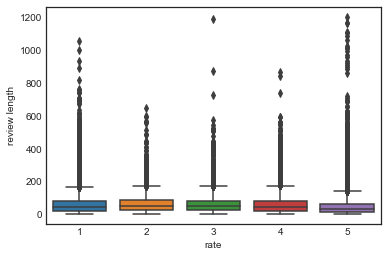

In [38]:
sns.boxplot(x='rate', y='review length', data=reviews)

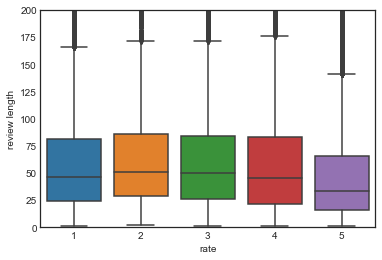

In [37]:
sns.boxplot(x='rate', y='review length', data=reviews)
plt.ylim(0, 200)
plt.show()

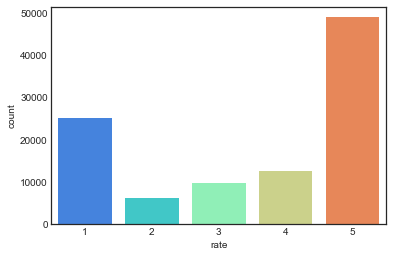

In [115]:
sns.countplot(x='rate', data=reviews, palette='rainbow')

## Preprocessing
### 1) Remove Foreign Lang & emojis

In [ ]:
# def extract_emoji(line):
#     emoji_pattern = re.compile("["
#             u"\U0001F600-\U0001F64F"  # emoticons
#             u"\U0001F919-\U0001F924"  # emoticons+@
#             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#             u"\U0001F680-\U0001F6FF"  # transport & map symbols
#             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                                "]+", flags=re.UNICODE)
#     return emoji_pattern.sub("", line)

# review_new = []
# for i in range(len(reviews)):
#     a = extract_emoji(reviews['review'][i])
#     review_new.append(a)
    
# reviews['review'] = review_new

In [131]:
len(list(reviews['review']))

102692

In [514]:
only_ko_en = list()

def lang_seperation(array):
    
    global only_ko_en 
    
    for item in array:
        hangul = re.compile('[^ ㄱ-ㅣ가-힣A-Za-z0-9♡\^~;♥❤❤️💓💘💕💞💟💜💛💖👍😍😘😻]+') # 한글과 띄어쓰기를 제외한 모든 글자
        # hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')  # 위와 동일
        result = hangul.sub('', item) # 한글과 띄어쓰기를 제외한 모든 부분을 제거
        only_ko_en.append(result)

        rest = hangul.findall(item) # 정규식에 일치되는 부분을 리스트 형태로 저장
        if len(rest) >= 1:
            print(rest)
    
    return "Seperation Completed"

In [515]:
rev = list(reviews['review'])
lang_seperation(rev)

[',', '.', '.']
[',', ',', '.', '.', '.', '.', '.']
['..', '.', '.', '..', '...', '.', '.', '.']
['.', '.', '.', '.', '!', '!!']
['.', ',', ',', '.', ',', ',', '.']
['..', '..']
['.', '.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '!!!', '!!!', '!!', ',', '.', '!!!', '!!!']
['.', '.', '.', '!!!']
['.', '.', '.', '.']
['..', '.', '...']
[',', '...', '...', '...', '...', '...?']
['.', ',', '.', '.', '!']
['..', '??', '??', '?']
['!', '!', '.', '.', '!', '!', '?']
['?']
['.']
['.', '.', '.', '.']
['!', '!', '.']
['?']
['?', '?']
['...', '.', '.', '.']
['...', '..', '..', '.', '...', '..', '...']
['?', ',', '?', '?', '?', ',', ',']
['.', '.', '.', '..']
['.', '.', '.']
['??']
['.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '..', '.', '..', '.']
['.', '.']
['...', '...', '?', '?']
['.', '....']
['...', '.', '.', '.', '.']
['....', '?', ',', ',', '.', '.']
['...', '.', '.', '.']
['.', ',', ',', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '!', "'

['.', '..', '..', '.', ',', '.', '..', '.']
['.', '.', '.', '.']
['.', '.', '.', '.', '.', '?', '.']
['..', '.']
['?', '...', '...', '?', '?', '...']
['.', '.', '.', '.', '..']
['?']
[',', '.']
['?', '.', '.']
['.', '.', '...', '.', '.']
[',', '.']
['.', '.', '..', '.', '.', '.', '.', '.', '.', '...', '.']
['!!!', '...', '!!!']
["'", "'", '.', '?', ',', ',', '.']
['.', '...', '..', '...', '..', '....', '..']
['..', '..']
['.', '.', '!']
['...', '..', '..']
[',', '.', '..', '.', '..', '..']
['??', '???']
['.', ',', '.', '.', '.', '.', ',', '.']
['.', '.']
['?', ',', '?', '.']
['.', '.', '.', '.', '.', '.']
['..', '.']
['?']
['.', '.', '?']
['.', '.', '.']
[',', '...', '...', '.']
['?', '?', '?']
['...', '.', '.']
['?']
['?']
['??', '..']
['.', '.', '.']
['...', '.']
['.']
['..', '..', '?', '..', '..']
['.', '.', ',', '...']
['.', '.', '.']
['.', '..', '.', '..', '.']
['?', '?', '.']
[',', '.', '.', '.']
['??', '.', '.', '.', '.']
['...', '...', '...']
['..', '...', '...', '...']
['...',

['.', '.']
['?', '...']
['...', '...']
['"', '"', '.', ',', ',', '.', '?']
['.', '.', '.']
['.', '.', '?', '.']
['.', '.', '?']
['.', '.', '...']
['.']
['.', '.', '.']
['.', '..', '??']
['.', ',', ',', '.', ',', ',', '.']
['?', '..']
['!!', '!']
[',', '.', '.', '.']
['.', '.']
['?']
['..']
['.', '.']
['...']
['!', '!', '!', '!', '.']
['.', '.']
['??']
['.', '?']
['!']
['.']
['!']
[',', '!', '.', "'"]
['.', '.', '.', '.', '.']
['?', '.', '.', '...', '.', '..']
['.', '.', '.']
['.', '.']
['!!', '!!']
['.']
['.', '.', '..', '..', '.']
['....', '?']
['?']
['.']
['...']
['.....']
['...', '!']
['!', '!', '!', '.', '!']
['.', '??', '.']
['.', '!', '.', '!']
['.', '.', '!', '!']
['.', '.']
['.', '.']
['..', '..', '!', '!', '!']
['...']
['.', ',', '.']
['!', '!']
['..', '.']
['.', '.']
['.', '!', '.......']
['?', '?']
['.', '..', '.', '.', '.', '?', '.', '.', ',', '.', '.', '.', '.', '.']
['.', '.']
['.......', '..']
['.', '?']
['.']
['.', '.', '.', '.', '"', '?"', '.', "'", '!', "!'", '.', '.'

['..', '.', '.']
['.', '.']
['.']
['?']
['!!!!']
['!']
['"', '"', '!!!']
['.']
['!']
['!']
['!!', ',', ',', '!!']
['.']
['!', '...', '!', '...']
['.', '.', '.', '.', '.', '.', '.', '!!']
['?', '?']
['!', '!', '!']
['.']
['..', '.']
['.']
['.', '.']
['...', '...']
['"', '..."', '.']
['.', '.']
['.!!!']
['.', '.', '.', '.', '.']
['.']
['.']
['...', '...', '...', '..']
[',', ',', '.', "'", "'", '!!']
['.', '.']
['?']
[',', '.', '..']
['?', '!']
['.', '..']
[',', '???']
['.', '.', '.', '.', ',', '.', ',', '.']
['?', '!!']
['?']
['..', '..']
[',']
['...']
['???']
['..', '..', '!']
[',']
['!!']
['.', '.']
['?']
['.', '..']
['.', '.', '.']
['?', '?']
['...']
['..', '...', '.', '...', '...', '..', '..', '!!']
['!', '!!', '...', '..', '.', '?', '?', '.']
['.', '.', ',', ',', ',']
['??', '?']
['!!!!!!']
['.', '.', '.']
['??']
['?', '.', '.']
['?', '.', '...', '?']
['??']
['.']
['?', '?']
['?', '?', '.']
['.', '.', '.']
['.', '?', '!']
['.']
['?', '.']
['?']
['.', '.']
['...', '......', '....', '

['!', '.']
['..', '!']
['.', '.']
['..', '.', '.', '.', '!']
['.', '.']
['.', '.', '..', '.']
['.', '.', '.']
['.']
['...', '...', '..']
['?']
['.....']
['.']
['.', '.', '.', '.']
['.']
['.', '!!', '...', '..', '.']
['...']
['...']
['.']
['.']
['?']
['!!!']
['.']
['.']
['?', '!']
['....']
['.!!!']
['!!!!!']
['!']
['...']
['..', '.', '.']
['..', '..']
['!', '!', ',', ',']
['!!!', '!!!']
['.']
['.', '.', '.', '.', '.', '.', '.']
['!']
['!']
['!', '!']
['!', '!', '?']
['.', '!']
['.', '.', '?', '?', '.', '.']
['.']
['..', '.', '..']
['?']
['.', '.']
['...']
['..']
['.', '.', '.', '.', '.']
['...', '.', '.', '.', '.']
['...', '...']
['?', '..', '..', '..', '??']
['..', '..']
['.', '.', '.', '.', '.', '...']
['..', '.']
['.']
[',', '.', '.']
['..']
['.', '.', '.']
['.', '.', '.', '.']
['!']
['...']
['...', '...', '.']
['!!']
['.']
['??']
['.', '.']
['?']
['.', '?']
['.', '.']
['?']
['?', '?', '..']
['.', ',', '.', ',', '.', '...', '.', '!']
['.', '.', '.', '?', '?', '.', '.', '.', '.', '.',

['?', '.']
[',', '..']
['?']
['...']
['??']
['!', '?']
['.', '.', '.']
['?']
['.']
['..']
['.', '?', '?']
['.', '?', '.']
['?', '...', '.', '.']
['!!!']
['!', '!']
['..', '.', '..']
['.', '.']
['...']
['.', '.', '.', '.']
['"', '"', '.', '.', '.']
['.', '.', '..']
['.']
['.', '.', '!', '!']
['.', '.', '.']
['.....']
['?', '...', '..', '.']
['?', '?', '...', '...']
['.', '.']
['..']
['.', '.', '.', '.', '...']
['.', '.', '.', '.', '.', '..', '.', '..', '..']
['.', '.', '..']
['.', '.', '.', '.']
['???']
['?', '?']
['.', '?']
['...']
['...', '.']
['..', '.', ',', '.', '.', '..?']
[',', '.', '?', '.', '.', '.', '..', ',']
['?']
['..', '...']
['??']
['...', '.', '.', ',', '.', '.', ',', '.', ',', '.', ',', '.', '.', '?', '.']
['...']
['..']
['.', '.']
['?']
['..', '..', '?']
['..', '..']
['.', '.', '.']
['.']
['.', '?']
['!']
['.', '.', '.', '.', '..', '.']
[',', '.', '...', ',', ',', ',', '?', '...', ',', '.']
['.', '.', '.', '.', '.']
['?', '..']
['?', '.', '!!!', '!', '!!!!']
['.', '.',

['.', '?', '?', ',', '.', '.', ',', '?', '.', ',', ',', '?', '.', '.', '.']
['.', '.']
['!']
['??']
['!', '.', '.']
['.']
['.', '.', '!']
['!']
['..']
['!!']
['!!']
['.', '.', '.', '.']
['!', '..', '!']
['!', '!']
['.', '..', '.', '.', '.', '.']
['.', '.']
['..', '.', '..', '..', '.']
['..', '..']
['..', '..', '..', '!']
['?', '...']
['!', '.']
['.', '...', '??']
['.', '....', '.']
['?', '?']
['?', '!', '.', '.']
['?']
['...']
['.']
['?']
['..', '..', '.']
['.', '.']
['..']
['?', '?']
['??']
['!!!']
['..?', '..', '.']
['?', '.', '.']
['?']
['.', '...']
['?', '.', '?']
['?', '......', '!']
['...', '.....', '....', '......', '..', '...', '.....', '....', '..', '........', '...', '....']
['?']
['??', '?', '?']
['.']
['!', '.', ',', '.', ',', ',', '.', ',', ',', '..', '.']
['?', '?', '..']
['..', '.']
['?']
['.']
['.', '.', '.', '..', '.', '!']
['.', '.', '..', '.']
[',', ',', ',', ',', '?', ',', ',', '?', '?', '.']
['...', '...']
['..', '..', '..', '..', '..', '..']
['.', '.', '.', '.', '

['..']
['!', '!!']
['.', '.', '.', '.', '.', '.']
['.', '!!!', '.', '.']
['.', '.', '.']
['.', '.', '.']
['.', '.', ',', '.']
['.', '..', '.']
['?', '.', '.', '!']
['.', '.', '!', '!']
['.', '.', ',', '.']
['.']
['.', '.', '.']
['.', '.', '.', '.', '.']
['.', '.', '.', '.']
['.', ',', ',', ',', '.', '.', '!!!!!']
[',', '...', '...', '..']
['.', '.']
['..', '..', '..']
['.', '.', '.', '.', '...', '.', '.', '.', '.']
['.', '.']
['.', '.', '!', '.', '.']
[',', '.', '.', '.', '.', '.', ',', '.', '.', ',', ',', '!!!!!']
['?', '!', '.', '.', ',']
[',', ',', ',', '.', '.']
['..', '.', '.', '..', '!']
['.', '.', '.']
['.', '.', '.']
['!']
['.', '.']
['.', '.', '.']
['.', '.', '.']
['?', '...', '.', '...', '.']
['.', '.', '.', '.']
['?', '?']
['..', '.', '.']
['...', '...']
['.', '.', '.', '!!!!']
['...']
['...', '...']
['!', ',', '!', '..', '.']
['.', '.', '.', '..']
['.', '.', '.']
['.']
[',', '...', '.', '.', '...']
['?', '.']
['..', '..']
['.', '.']
['!', '.']
['...', '...', '..', '...', '.

['.', '?']
['?']
['..']
['.', '.', '.', '.', '.', '?', '.', '.', '.', '?', '?', '.', '.', '.', '....']
['?']
['?']
['...']
['.']
['.']
['?']
['?']
['....', '.', '.', '...']
['??']
[',', '.', '.', '.', '.', '.']
['...', '?']
['..', '..', '..']
['?']
['.']
['.', '.', '.']
['.', '.']
['..', '...', '..']
['.', '..']
['.', '.', '..']
['..']
['.', ',', '.', '.', '.', '.']
['!', '!']
['.']
['.', '.', '.']
['.', '.', '.']
[',', '.!']
['.']
['!', ',', '!']
['!', '.', '.']
['.']
['.']
['.']
['.', '.', '.']
['.']
[',', '.']
['..']
['!!!']
['.', '.', '...']
['?']
['.', '.', '!!', '.', '.', '.']
['...']
['.']
['.']
['..']
['.', '.', '.']
['.', '.']
['...', '.']
['.', '.']
['.']
['!']
['??']
['.']
['!']
['!']
['.', '.']
['...']
['.']
['..', '..']
['.', ',']
['...']
['!']
['.']
['.']
['??', '??', '??']
['.']
['?']
['??', '??']
['?', '?']
['!!!']
['.', '.', '?', '.', '.', '.']
['!!', '!!', '!']
['.', '.']
['.']
['?', '.']
['...']
['.', '.', '.', '.', '......']
['.', '.', '!!!']
['.', '.']
['...', '..'

['?']
['...', '..', '??????']
['..']
['..', '.', '..', '.']
['!', '.']
['???', '???']
['..', '..']
['?']
['?']
['.', '..', '?']
['.']
['.', ',']
['?', '?']
['?']
['.']
['?']
['....', '......', '....', '....']
['...', '?']
['..', '..']
[',', '.', '.']
['...', '....', '....??', '...', '...', '...??', '...??', '...']
['.']
['..', '.', '..']
['..']
['?']
['!!!']
['..', '..']
['!']
['.', '.']
['!']
['.']
['.']
['.']
['!']
['?', '?']
[',', ',', ',']
['.']
['..']
['.', '.', '.']
['.', '..']
['?']
['.']
['...']
['.']
['.', '.', '.', '.', '.', '!!']
[',', '?']
['?']
['.', '.']
['.', '.', '?']
['?']
['.', '!', '.']
['.']
['?']
['.', '.']
['?']
['"', '"']
['!', '!']
['.']
['.']
['.']
['.', '.']
['???', '.']
['!', '.', '.', '.', '.']
['.', '?']
['.']
['.']
[',', '.']
['.', '.', '.']
['..', '!']
['...', '!!!', '!!!!']
['.']
['.', '.', '.', '.', '!!!!!!!!']
['.', '.', '..', '.']
['...', '.', '..', '...']
['??', '!!!']
['?']
['.', '.', '?']
['..']
['?', '?']
['.', '.', '.', '.']
['...']
['.', '..']
[

['?']
['?']
['???????']
[',', '??!!', '.']
['?']
['..']
['.', '.', '.', '....']
['...']
['..', '..']
['...', '...']
['.', '.', '.', '.', '.', '.']
['...']
['!']
[',', '.', '.', '?']
[',', '.', ',', '.', '.']
['...', '..', '..', '?']
['...', ',', ',', ',', '.', '.', '.', '.....']
['?']
['?']
['...']
['.', '.', '.', '.', '.']
['?']
['!!']
['.']
['...', '..']
['.', '.', '.', '.', '.']
['....', '"', '"', '.']
['.', '.', '.']
['!', '.', '.', '.', '.', '.', '.']
['.', '.', '.']
['.', '.', '.', '.', '.', '.']
['.', ',']
['!', '!']
['.', '!', '!', '.', '.']
['!!']
[',']
['!!', '..', '..!!']
['!', '.', '.']
['.']
['..', '..', '..']
['!!', '.', '.', '?', '!!!']
['!']
['.', ',', ',', '.', '.']
['.', ',', '.', '.']
['!', '.', '.', '??']
['.', '.', '.']
['??']
['..']
['?', '?', '"', '?', '"']
['.', '?', '.', '?', '.']
['?', '.', '.', '.']
['.', '...', '...', '...']
['...', '...', '....', '....', '....']
['??', '.', '.', '.', '.', '.']
['.', '.']
['..', '.', '..', '...?', '...', '...?']
['.', '.']
[

['.', '!', '.', '!']
['.', '.', '.', '.', '!']
['.', '.', '.']
['.', '...', '.', '.', ',', '.']
['.', '.']
['!!']
['...']
[',', '!']
['!']
[',', '..']
['.']
['..', '!!!']
['.', '!!']
['.', '.']
['.', '!!']
['!']
['.', '.', '.']
['.', '?']
['...', '.']
['.', '.']
['.']
['.']
['..']
['.', '.']
['.']
['?', '.', '..']
['.', '.', '.', '....']
['...', '...']
['.']
['..', '..']
['?', '..']
['?']
['?']
['?', '.']
['..']
['..']
['.']
['..']
['.', '.', '..']
['.', '???']
['.', '.', '..', '...']
['.']
['...']
['!!!!!']
['?']
['?', '?']
['.', '?']
['.', ',', '.', '.']
['.']
['?', '....', '.....', '??']
['.', '?']
['.']
['.']
['.', '.']
[',']
['.']
['.']
['...', '?']
['...']
['!']
['!!!', '.', '.']
['.', ',', '.']
['!', '!']
['.']
['.', '.']
['?', '.', '.', '.', '.', '.', '.']
['.']
['.', '.', '.']
['?']
['.', '.', ',', ',', ',', ',', '.', '.', '.', '.']
['!!']
['?']
['.', '.', '.', '.']
[',', ',', '.']
[',', '.', '.']
['..']
['?', '!']
['.', '.']
['.']
['..']
['.', '.', '.', '.', '....']
['...', '

['!!']
['..']
['...']
['??']
['...']
['!']
['...']
['.', '.']
['!!']
[',']
['!!']
['!!']
['!!', '!!']
['.', '...', '.']
['..']
['"', '"', '!!']
['.']
[',', ',']
['..', '...']
['.']
['.', '.', '.']
['.']
['"', '"', '!!']
['.', '.', ',', '?', '...']
['..', '.']
['.', '..', '...', '..', '.']
['.', '.', '.']
['.', '..', '..', '.']
['.', '..', '.', '.']
['.', '.']
['!']
['..']
['.']
['.']
['.', '!!']
['.']
['.', '.']
['.', '.']
['.', '.']
['.', '.', '.']
['..']
['!!']
['..', ',', '..']
['!']
['..']
['...']
['?']
[',', ',', ',']
['!!']
['!']
['?']
['......', '....']
['.']
['...', ',']
[',', ',', '...']
[',']
['!!']
['....']
['.']
['.', '!', '!']
['?']
['..']
['!!!!']
['.']
['..']
['.', '.']
['.']
['....', '...', '...', '??']
['!']
['..']
['!!']
[',', ',']
['!!!']
['!']
['..']
['!', '!']
['!!!!!', '.']
['!', '!!!']
['!!']
['!']
['..', '..', '..']
['.']
[',']
['!', '!']
['!']
['?']
['.', '.']
['...']
['...', '..']
[',', '??']
['!']
['.']
['.']
['.']
['!']
['.', '?']
['.....', '......']
['??', 

['...', '?']
['...', '...', '...', '...', '...', '...', '...?', '...', '...', ',', '...', '...', '...', '....', '...', '!!', '!!']
['?', '?']
['...', '????????']
['?']
['.']
['?', '?', '.']
['!', '!!', '!!']
['?', '?']
['?']
['.']
['..']
['?']
['..']
['??', '....', '??', '??']
['.']
['!!!', '!!!!!!!!!']
['?']
['!!!!!']
['!']
['!!!!!!!!!!!']
['!!']
['.']
['.']
['!!', '!']
['!!']
['.']
['!', '!']
['!!!!!']
['...']
['...']
['.']
[',', '!', '!']
['!!', '?', '!!']
[',', '.....', '.']
['!']
['..', '..']
['.']
['.', '.', '.', '??']
['...', ',', '...', '...', '.', '..']
['..']
['!', '.', '.', '.', '.', '!']
['.....']
['.']
['.', '.', '.']
['!', '!']
['.', '.']
[',']
['!']
['?']
['!!', '?', '..', '!!']
['!!!']
['.', '.']
['.', '.', '.']
['...']
['.']
['!', '!!']
['.', '.']
['!']
['...', '.', '.', '.', '.']
['.', '.', '.', '.', '.', '.', ',', '?', '?', '.', '.', '.', ',', '.']
['?']
['..', '?']
['...', '...', '...', '.....', '!', '!!!']
['..', '..']
['.', '.']
['..?']
['......', '...', '?', '...

['!']
['.']
['..', '..']
['.']
['.', '.']
[',']
['.']
['!']
['.', '?', '.', '?']
['..', '..', '.']
['.']
['.,']
['??']
['!']
['...']
['?']
['..']
['...', '....']
['.....', '.', '.']
['...', '?']
['.....', '......']
['.....', '!!!!!']
['...', '!']
['..']
['!']
['!!']
['.']
['!', '..']
['!!']
['???']
['!!']
['!!']
['.', '....']
['.', '....']
[',', '.', '.']
['...', '?', '.', '....']
['.', '!', '!']
['......', ',', '....', ',', '.....', ',', ',', '.', '?!']
['...', '...', '.']
['?', '?', ',']
['!']
['....']
['?']
['!!']
['!!', '!!']
['.', '...', '....']
['..', '..']
["'", '...', "'", ',', "'", '.', '?', ',', '!!!']
['.']
['.', '?']
['!!!!']
["'", "'", '......']
['!', '...']
['.', '...']
['.']
['.']
['???????????']
['.', '.', '...', '...', '...', '..', '...', '...', '...', '...']
['!', '..', '!', '!', '!']
['.']
['..', '..']
['...']
['.', '.', '.']
['?', '...']
['.', '.']
['.']
['?']
['.']
['.', '.']
['...']
['...']
['.', '.', '"', '"', '.', '.', '.', ',', '.']
['.', '.', '.', '.', '.', ',

['.']
['.', '.', '.', '.']
['..', '??']
['?']
['.', '.', ',', ',', '.', '.', '.', '.']
['!!']
['?']
['..', '?']
['?..']
['!']
['!!!']
['?', '?', '?']
['.', '.']
['?', '.', '?', '...']
['.', '.', '.', '.']
['!']
['!', '.']
['.', '..']
['.']
['.', '.']
['...']
['..', '.', '.', '.']
['.']
[',', '.', '.', ',', '?', '?', ',', '.', ',', '.', '.', '.']
['...']
['?', '?']
['.']
['.']
['...']
['??', '?', '?']
['??']
[',', '.', '.']
['?', '??']
['.', '.']
['..']
['.']
['..']
['!', '!!']
['!!', '!!!']
['.']
['..']
['?']
['...', '..', '..', '..', '..', '...']
['.', '.', '.', '.', '.....']
['?']
['!']
['?']
['!!']
['..', '..', '...']
['.', '..']
[',', ',']
['...', '?', '.....']
['..', ',']
[',', '.?']
['?', '..']
['.']
['.', '..']
['???', '...']
['.', '.', '..', '...', '.', '..', '..']
['!', '.', ',', '..']
['!', '!']
['.']
['.', '..']
['.', ',', ',', '.', '.', '.', ',', '.', ',', ',', '.', ',', ',', '.']
['.', '.', '.']
['.', '.', '.']
['.', '.', '..']
['!!!', '.', '.', '!!']
['.', '.', '.', '.']


['.']
['...']
['.']
['.']
['...', '.']
['?']
['?', '?']
['??']
['..']
["'", ',', '.']
['.', '.', '.']
['.']
['??', '??']
['.']
['.', ',', '.']
['.']
[',', '.', '..', '.']
['..']
['.']
['?', '!!!']
['.', '.', '.']
['.', '.', '.', '.', '.']
['!', "'", '.']
['...', '?']
['.', '.', '.', '.']
['.', '.', '.']
['?', '.']
['.']
['.', '.']
['!', '!']
['?']
['.']
['..', '??!!']
['!']
['!!!']
['.', '.']
['.']
['.']
['!!']
['.']
['.', '.', '.']
['.', '.']
['.', '?', '?']
['?']
['?']
['.', '.', '.', '..', '..', '..', '....']
['.', ',', '.', '.']
[',', ',', '.']
['.', '...', '...', '?', '....', '?']
['..', '..']
['?']
['.']
['.', '.', '!']
['.', '.', '?']
['?']
['.']
['?']
['.', '.']
['?']
['?', '.', '.', '.', '.']
['...', '!!!', '...', '!!!!!!!?!!']
['.', '.', '.', '?', '.', '.', '.', '.', '.']
['?', '...']
['..']
['?']
['.', ',', ',', '.', '.']
['.', '..', '?']
['"', '"', '..', '?']
[',']
['..']
[',', '.', '.']
['!']
['.', '.']
['.']
['.', '!']
['!!!', "'", ',', ',', '.', '?']
['.', '.']
['!']
['.

['..', '.', '..', ',', ',', '.', '.', '.', ',', '.', ',', ',', ',', ',', '.', '.']
["'", '.', '.', '.']
[',']
[',', '!']
['.', '.', '.', '...']
['.', '.', '.', '!']
['.']
[',', '.', '!!']
['.', '.', '.', ',', ',', ',', '.', '.', '.', '.']
['.']
['!', '.']
['!!']
['...', '...', '...', '..', '.', '.', '..', '..']
['.', '.']
['?']
['.', '.', '.', '..']
['!', '!']
['.', '.', '.', '.']
[',', '.']
['!!']
[',', '.']
['!', '!']
['...']
['?', '.', '.', '.', '.', '.']
['.', '.', '.', '.', '?']
['!', '.']
['.', '...']
['..']
['.', '!', '?..', '..']
['!!']
['!']
['..', '...', '!']
['?']
[',', '.']
['!', '!']
['!!', '!!']
['!!', '!!', '!']
['!', '!']
['.']
['.']
['...']
['.', '.', '?', '.', '.']
['?']
['.']
['..']
['...', '.', '.', '.']
['.', '.']
['.']
['?']
['....']
['.', '.']
['.']
['...', '...', '...', '..']
['.', '...']
['.', '...']
[',,,']
['..', '..']
['.']
['?']
['..', '.']
['.']
['"', '"', '..', "'..", '..']
['.', '.', '..', '..', '..', '?', '..', '..', '..', '..', '..', '..', '..', '..', 

['!', '!']
['!!']
['.']
['..', '..', '..', '..']
['!']
['...']
['!!', '!!', '!!']
['?']
['...', '.', '.']
['.', '.']
['.', '?']
['?', '??']
['...', '.', '.....']
['...', '..']
['...']
['..']
[',', '!']
['?']
['.']
['!']
['......']
['....']
['...']
['......']
['.', '.', '.', '?', '.']
['.', '.']
['.', ',']
['.', '.']
['.', ',']
['.']
['?']
['.']
['..']
['?']
['...', '?']
['....', '....', '....!', '!!!!!!!', '.....!!!!!!!!!!!!!!!!!!!!', '...']
['...']
['!!']
['!']
['?', '....']
['..']
['?']
['.']
['.', '.', '.', '....', '...', '...']
['.']
['??']
['?....']
['.']
['.', '.']
['..?', '..']
['.', '?', '...', '.']
[',']
['.']
['?']
['.']
['?']
['..']
['.', '.', '.', '.']
['!', '.']
['.', '...']
['.']
['.', '.']
['.']
['?']
['.', '.', '.']
['.', '.']
['!']
['..']
['!']
['.', '.']
['.']
['.']
['!']
['!!!']
['.']
['.']
['...']
['...', '...', '.']
['?', '?', '???']
['.', '.']
['.', '.']
['.']
["'", "'"]
['..']
['.', '.', '.', '.', ',', '.']
['?']
['?']
['...', '...']
['!', '!', '!', '!', '!', '!'

['...']
['...', '!?', ".''"]
['.', '??']
['?']
['!', '?!']
['?']
['.']
['..']
['.', '.']
['.']
['!', '!']
['.', '!']
['!']
["'", '!']
['.', '.']
['!']
['.']
['.', '.']
['!']
['!']
['.', '.']
['...', '!!']
['.']
['!!', '!!!!!']
['!!!!', '!!', '!!!']
['!!']
['!']
['.']
['.']
['!', '?', '?', '?', '.']
[',']
['!!', '!']
['!!']
['!']
['!']
['.']
['!!!!!!!!']
['?']
['??']
['!!!!!']
['.', '..']
['..', '..']
['.']
['!']
['.,']
['?']
['.']
['!!', '?']
['?', '...']
['.', '.']
['!']
['.', '.']
['?']
['!!', '!!']
[',']
['.']
['!']
['!']
['.']
['.,']
['...', '...']
['.', "'", "'", "'", "'", '.', "'", "'", "'", "'", '.']
['..', '...', '..']
['?']
['...']
['???']
[',', '.']
['.....', '....']
['...', '?', '.', '.', '.']
['!!!!!']
['..', '!', '..']
['!']
['!']
['!']
['..', '..', '...', ',', '.', '...']
['...']
['!!!!']
['.']
['.']
['?']
['!', '!']
['!!']
['...!!']
['??', '.', '..']
['?']
['.']
['!!!']
['!']
['?']
['?', '!!']
['...']
['?', '!']
['!', '!']
['.', '.']
['....']
['...', '.', '.']
['!!']
['.

['.', '.']
['...', '.']
['...']
['.', '.']
['?']
['..', '?!!']
['?', '?', '?']
['.']
['?']
['.', '.']
['!!']
['!', '!', '!!!']
['!', '.', '.', '.']
['.', '?.?', '!']
['!']
['!', '!!']
['!!']
['!', '.', ',', '!']
['!', '!', '!', '!']
['!!']
['.']
['.', '.', '.']
['.']
['!']
['.']
['!!!']
['.']
['.']
['!']
['!!!']
['.', '..', '.']
['.', '....']
['..', '..']
['.']
['.', '.']
['.']
['.', '...']
['..']
['.', '.', '.']
['.', '!!']
['!!']
['.']
['!', '.']
['!!!!!']
['...']
['...']
['!!']
['.']
['!!', '.']
['.......']
['!!!!!']
['!!']
['!!', '!!']
['!', '!']
['..', '....']
['!!!', '!']
['!']
['.']
['!']
['.']
['!!!', '.']
['??']
['.', '?!']
['?']
['!']
['?', '?', '?', '..', '..', '...', '....', '.....', '....']
['?', '?', '?', '..']
['??', '...']
['..']
['.']
['.', '?', '.']
['.', '?', '.', '.', ',']
['??']
['???']
['?']
['!!', '..', '..?']
['?', '?', '..']
['!']
['.', '..']
['.', '?', '.......']
['.', '.', '.', '.', '....', '.']
['??..']
['?']
['?', '..']
['!', '..', '...', '...', '...']
['!!

[',', '.', '.', '!', '!']
['!']
['..']
['!!!!']
['..']
['.']
["'", '.']
['.']
['.', '.', '.', '.', '.', '.', '.', '.', '.', ',', '.', '.', '.']
['...']
['..']
['..']
['.', '...', '.']
['..', '....']
['...']
['.']
['..']
['...']
['..']
['...']
['!!']
['!']
['.', '.', '.', '.', '.', '.', '.']
['..']
['.']
['.']
['!']
['...']
['...']
['!!']
['!']
['?']
['??']
['??']
['!!']
['.', '!']
['!!!']
[',']
['.']
['.', '.']
['!']
['!!']
['.', '.', '.', '.', '.', '.']
['..', '..']
['.']
['..', '..']
['.', '.', '.', "'", '...']
['.']
['.']
['...']
['!']
['..', '..', '..', '..', '..']
['.', '.']
['..']
['.']
['...']
['..']
['...', '?']
["'"]
['.']
['?']
['.', '.']
['.']
['.']
['.']
['!']
['.']
[',', '.']
['?', '?']
['.']
['?']
['...']
['....', '...', '...']
['...']
['...', '.', '!!!!!!!']
['?']
['.....']
['?']
['..']
['??']
['.']
['.', '.', ',', ',', '.', '.']
['!']
["'", '.', '.']
['!']
['??']
['!']
['..']
['!!']
['..']
['??']
['?']
['..', '.', '?', '.!']
['?']
['..', '!!']
['..?']
['.', '.', '.', '.

['...', '?', '...', '!', '?!']
['!', '!']
['...', '..', '...', '...']
['?']
['..']
['...']
['?']
['.', '.', '.']
[',']
['.']
['.']
['.', '"', '"', '.']
['?', '.']
['!', '...']
['.', '.', '.']
['.', '.', '....']
['.']
['.']
['.']
['.', '.']
['.', '.', ',', "'", "'", "'", "'", '.']
['.', '...', '...', '.']
['?', '?', '!']
[',', '.']
['.']
['??']
['....', '.', '!', '!', '!']
['..', '...', '!!']
['!!', '!!']
['..', '..', '..', '..']
['.', '.']
['.', '.']
['...']
['.', '.']
['?!?!']
['.']
['.']
['.']
['!']
['.', '.', '.', '..', '?', '??']
['.', '!!', '.']
['!!']
['.', '.']
['.', '?', '..']
['..', '..']
['.']
['.']
['.', '.', '.', '.', '?']
["'", "'", "'", "'", ',', "'", "'"]
['.']
['?']
['!!']
['!!!']
['?!']
['..', '..']
['!!!!!!!', '!!!!']
['!']
['.', '.', '..', '.']
['.', '.', '.']
['.']
['...', '?', '....']
[',']
['?', '?']
['.', '..']
['.', '.', '.', '.', '.', '.', '.']
['.', '!']
['.', '!', '..!!!', '..', '..', '.']
['.', '.', '...', '....']
['.', '.', '.', '.', '!']
['.', '.', '.', '.

['.', '...', '.', '...', '.', '...', '.']
['.', '?', '.']
['!', ',', '.']
["'", "'", "'"]
[',']
['.']
['!!']
['!!']
['!']
['!', '.']
["'", ',']
['!']
['.']
['!']
['.']
['!']
["'", "'"]
["'"]
['!!']
["'"]
["'", '.']
[',...', '!!']
['..']
['.', '.', '?', '?']
['.', '.', '...', '....']
['?']
[',']
['?']
[',', ',']
['!']
['.....']
['.']
['?']
['?']
['!']
['..']
['.']
['!', '.', '?']
['?']
['..']
['?']
['.', '.']
['.']
['!', '.', '.']
['.', '.']
['..', '.']
['!!', '!!!', '!!']
['.', '!']
['!']
['.', '.']
['.']
['!!']
['...']
['.', '.', '.', '.']
['!!!', '!!']
['.']
['.']
['!', '!', '!']
['!!']
['!']
['!!']
[',', '.', '..']
['..', '..', '..', '..']
['..', "'", "'", '..']
['..', '.', '!!']
['?']
['..']
['..', '.']
['?', '.', '?', '...?']
['?', "'", ".'", '!']
['!!!!', ',', '?']
['!!', '!', '?..', '...', '...', '..', '!']
['?']
['?']
['.', '..', '.', '.', '..']
['.....................']
['.']
['...', '.', '...', '....']
['..', '....']
['!']
['!', '?!']
['.']
['!']
['!']
['!', '!']
['...', '?']

['!', '!']
['!!']
['!!!']
['!']
['!']
['.', '.', '?', '.', '.', ',', '.', ',', '.', '?']
['???', '..', '...']
['.', '.', '.']
['....']
['.']
['.']
['!']
['.', '.', '...', '?', '?']
['.']
['!']
['!']
['..']
['?', '.', '.', '.', '.']
['?']
['?', '.']
['.', '?', '.', '.']
['??']
['!!!']
['!']
['!', '!']
['!']
['!']
['!']
['.']
['...']
['...']
['!']
['!']
['.']
['.', '.']
['...']
['.', '.', '.', '.', '?']
['..', '...', '.', '??']
['.', '.']
['.', ',', '.', '.', '.', '.', '.']
['?']
['.']
['.']
['.']
['.']
['.', ',', '.', '.']
['.', '!']
['!', '!!']
[',', '!!', '.', ',', ',', '.', '.', '.']
['.']
['.']
['.', '.....', '...']
['.']
['!!!!!!', '.']
['.']
['...']
['...', '!!!!!!!!', '.']
['.']
['!!!', '.', '.', '!']
['.']
['.', '.', '.', '.', '.', '.', '.', '.', '.']
['.', '.', '.', '.']
['!!', '.', '!', '!']
['!!!']
['.', '.']
['..', '..', '..']
['!!', '!!']
['!', '!!!']
['.']
['!']
['.', '.']
['.', '?']
['..', '.']
['!!!']
['!']
['?']
['!', '!']
['.', '.']
['?', '!']
['!!!']
['?']
['.', '.', 

'Seperation Completed'

In [516]:
len(only_ko_en)

102692

In [517]:
reviews['review'] = only_ko_en

### 일부 함수로 삭제되지 않은 애매한 광고성 글 삭제

In [217]:
# a = reviews['review'][164].replace(reviews['review'][164][:26], "")
# b = reviews['review'][200].replace(reviews['review'][200][:19], "")
# c = reviews['review'][256].replace(reviews['review'][256][:18], "")

# reviews.loc[164, 'review'] = a
# reviews.loc[200, 'review'] = b
# reviews.loc[256, 'review'] = c

In [519]:
reviews['review'][256]

'폰을 최신버전으로 업데이트하라는데 어떻게 해요'

In [520]:
applist = list(reviews['app'])

In [521]:
len(applist)

102692

In [522]:
app_strip = list()
for app in applist:
    app_ = app.strip()
    app_strip.append(app_)
    
reviews['app'] = app_strip
    

In [523]:
reviews.dtypes

app              object
_id              object
date             object
rate              int64
review           object
user             object
review length     int64
dtype: object

In [524]:
reviews.tail()

app                       _id           date  rate  \
102687  SmiRing  5a2ab22e8abf5a3f6f3b1138  2012년 12월 10일     5   
102688  SmiRing  5a2ab22e8abf5a3f6f3b1139   2015년 8월 26일     1   
102689  SmiRing  5a2ab22e8abf5a3f6f3b113a   2013년 1월 19일     5   
102690     마미새미  5a2ab23d8abf5a3f6f3b113b    2017년 5월 5일     5   
102691     마미새미  5a2ab23d8abf5a3f6f3b113d    2017년 9월 1일     5   

                                                  review        user  \
102687               신기해요 와~신기해요근대 어떻게 이런 평범한 소릴듣고 잠을 자지        정윤지    
102688  앙 전혀 효과 못봄 아기가 들을수록 난감하게 울어대요 이걸 막 던져가주구 이걸 지웟어용         리릴    
102689                                수중고동이젤조아요잘때 잠자기조은소        이효배    
102690                                        무료수업 듣고싶어요   붐3 Boom3    
102691                                          진석이 코 개큼         영채    

        review length  
102687             39  
102688             48  
102689             19  
102690             10  
102691              8

In [525]:
reviews.groupby(['review length', 'rate']).count()

app  _id  date  review  user
review length rate                              
1             1       2    2     2       2     2
              3       2    2     2       2     2
              4       2    2     2       2     2
              5      10   10    10      10    10
2             1      48   48    48      48    48
              2       3    3     3       3     3
              3      16   16    16      16    16
              4      32   32    32      32    32
              5     225  225   225     225   225
3             1      82   82    82      82    82
              2       7    7     7       7     7
              3      28   28    28      28    28
              4      65   65    65      65    65
              5     376  376   376     376   376
4             1     119  119   119     119   119
              2       8    8     8       8     8
              3      28   28    28      28    28
              4      81   81    81      81    81
              5     511  511   511     511   511
5             1     132  132   132     132   132
              2      22   22    22      22    22
              3      41   41    41      41    41
              4     113  113   113     113   113
              5     677  677   677     677   677
6             1     258  258   258     258   258
              2      30   30    30      30    30
              3      70   70    70      70    70
              4     164  164   164     164   164
              5     950  950   950     950   950
7             1     322  322   322     322   322
...                 ...  ...   ...     ...   ...
742           1       1    1     1       1     1
754           1       1    1     1       1     1
761           1       1    1     1       1     1
820           1       1    1     1       1     1
839           4       1    1     1       1     1
862           5       1    1     1       1     1
863           4       1    1     1       1     1
869           3       1    1     1       1     1
883           5       1    1     1       1     1
888           1       1    1     1       1     1
897           5       1    1     1       1     1
910           5       1    1     1       1     1
918           5       1    1     1       1     1
933           1       1    1     1       1     1
935           5       1    1     1       1     1
954           5       1    1     1       1     1
966           5       1    1     1       1     1
993           5       1    1     1       1     1
997           1       1    1     1       1     1
1010          5       2    2     2       2     2
1023          5       1    1     1       1     1
1054          1       1    1     1       1     1
1060          5       1    1     1       1     1
1086          5       1    1     1       1     1
1104          5       1    1     1       1     1
1111          5       1    1     1       1     1
1162          5       1    1     1       1     1
1165          5       1    1     1       1     1
1186          3       1    1     1       1     1
1201          5       1    1     1       1     1

[1903 rows x 5 columns]

### Data Preparation for Analysis

In [526]:
# 1-4점은 부정의견, 5점은 긍정의견으로 분류
neg_rev = reviews[(reviews['rate'] == 1) | (reviews['rate'] == 2) | (reviews['rate'] == 3) | (reviews['rate'] == 4)]
pos_rev = reviews[reviews['rate'] == 5]

In [527]:
neg_rev.loc[:, 'response'] = 'neg'
pos_rev.loc[:, 'response'] = 'pos'

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [528]:
from sklearn.utils import shuffle

In [529]:
df = pd.concat([cons_rev, pros_rev], axis=0)
df = shuffle(df)
df.tail()

app                       _id           date  rate  \
26595       스마트 온비드  5a29338d8abf5ad2ff5e3007  2017년 10월 18일     3   
3635         네이버 웹툰  5a2933868abf5ad2ff5dd657  2017년 11월 24일     1   
65429          기차여행  5a2933948abf5ad2ff5ec7b9   2016년 2월 15일     3   
99448     중고차 시세계산기  5a2aad368abf5a3f6f3b03b7   2015년 10월 8일     1   
20821  초월 for Kakao  5a29338b8abf5ad2ff5e1979   2017년 8월 19일     5   

                                                  review   user  \
26595                                      사진도 볼수있게 해주세요   박성훈    
3635   보통 만화들어가면 회색으로 표시되있는 위아래로한번에 당기는게 없어져서 너무불편합니다...   임서진    
65429  업데이트좀 하셔야 할듯 전국노선도가 대체 언제 버전인지..멋지게 만든 앱인데 아쉽네...   배병련    
99448                                    Lpg차량은 없네요 아쉬워요   박시훈    
20821  초월을 구음진경 이후로  정말 재미있게 재미있게 하고 있습니다....컨트롤도 최고고...   루디칸    

       review length response  
26595             13     cons  
3635              72     cons  
65429             86     cons  
99448             15     cons  
20821            223     pros

In [530]:
X = df['review']
y = df['response']

# Benchmark 
## 80% (Accuracy, CountVectorizer, NaiveBayes)

* CountVectorizer이용한 BOW구축

In [531]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer().fit_transform(X)

* Train-Test Set 분리

In [532]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cv, y, test_size=0.2, shuffle=True)

In [533]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82153, 317773), (20539, 317773), (82153,), (20539,))

* Cross Validation

In [534]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [535]:
scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5, scoring='accuracy')
print("cv_score_MNB: {:.2f}".format(np.mean(scores)))

cv_score_MNB: 0.80


In [536]:
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5, scoring='accuracy')
print("cv_score_LR: {:.2f}".format(np.mean(scores)))

cv_score_LR: 0.79


* Test Data에 모델 적용

In [537]:
mnb = MultinomialNB().fit(X_train, y_train)

In [538]:
prediction = mnb.predict(X_test)
accuracy_score(y_test, prediction)

0.79570573056137106

In [539]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

       cons       0.84      0.76      0.80     10780
       pros       0.76      0.84      0.80      9759

avg / total       0.80      0.80      0.80     20539



# Modeling

### Model Selection
* NaiveBayes(Multinomial)
* LogisticRegression
* RandomForest

### Model Optimization (Parameter Tuning)
* Konlpy 이용한 Tokenize (mecab, twitter/ morphs, pos, nouns), Tf-Idf
* Stopwords, n-gram, min_df
* etc.


### 1) Applying Konlpy Tokenizer (Mecab, Twitter)

In [440]:
X.shape, y.shape

((102692,), (102692,))

In [441]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from konlpy.tag import Twitter
from konlpy.tag import Kkma
from konlpy.tag import Mecab

mecab = Mecab()
twitter = Twitter()

In [446]:
def mecab_tokenizer(text):
    return ['/'.join(t) for t in mecab.pos(text)]
def twit_tokenizer(text):
    return ['/'.join(t) for t in twitter.pos(text, norm=True, stem=True)]

* CountVectorizer with mecab tokenize(POS) : **81%** (Accuracy)

In [540]:
cv2 = CountVectorizer(tokenizer=mecab_tokenizer).fit_transform(X)

In [541]:
X_train, X_test, y_train, y_test = train_test_split(cv2, y, test_size=0.2, shuffle=True)

In [542]:
scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5, scoring='accuracy')
print('cv_scores_mecabTokenize_mnb: {}'.format(np.mean(scores)))

cv_scores_mecabTokenize_mnb: 0.8159044094494871


In [543]:
mecab_mnb = MultinomialNB().fit(X_train, y_train)
prediction = mecab_mnb.predict(X_test)

print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

0.820487852378
             precision    recall  f1-score   support

       cons       0.83      0.82      0.83     10700
       pros       0.81      0.82      0.81      9839

avg / total       0.82      0.82      0.82     20539



* CountVectorizer with Twitter Tokenize(POS): **81%**(Accuracy)

In [467]:
cv3 = CountVectorizer(tokenizer=twit_tokenizer).fit_transform(X)

In [469]:
X_train, X_test, y_train, y_test = train_test_split(cv3, y, test_size=0.2, shuffle=True)

scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5, scoring='accuracy')
print('cv_scores_mecabTokenize_mnb: {}'.format(np.mean(scores)))

mecab_mnb = MultinomialNB().fit(X_train, y_train)
prediction = mecab_mnb.predict(X_test)

print('accuracy score: {}'.format(accuracy_score(y_test, prediction)))
print(classification_report(y_test, prediction))

cv_scores_mecabTokenize_mnb: 0.8171094919409384
accuracy score: 0.8153756268562248
             precision    recall  f1-score   support

       cons       0.83      0.81      0.82     10758
       pros       0.80      0.82      0.81      9781

avg / total       0.82      0.82      0.82     20539



* Hashing Vectorizer

In [ ]:
%time
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=10)

hv.transform(X)

### CountVectorized data analysis

* Punctuation, Number 다 삭제 하는게 나을듯..(Stopwords에 추가하거나 앞에서 전처리!!)

In [482]:
vect = CountVectorizer(tokenizer=twit_tokenizer).fit(X)
count = cv3.toarray().sum(axis=0)

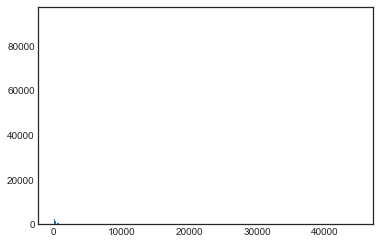

In [483]:
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(vect.get_feature_names())[idx]
plt.bar(range(len(count)),count)
plt.ylim(0, 10000)
plt.show()

In [484]:
from konlpy.utils import pprint

pprint(list(zip(feature_name, count)))

[('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 92960),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 62513),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 42846),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 36690),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 34777),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 28336),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 25366),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 25233),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 24574),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 24043),
 ('!!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 18243),
 ('!!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 16664),
 ('!!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 16326),
 ('!!!!!!!!!!!!!!!!!!!!!!/Punctuation', 14971),
 ('!!!!!!!!!!!!!!!!!!!!!/Punctuation', 14464),
 ('!!!!!!!!!!!!!!!!!!!!/Punctuation', 14172),
 ('!!!!!!!!!!!!!!!!!!/Punctuation', 12873),
 ('!!!!!!!!!!!!!!!!!/Punctuation', 1

 ('861191/Number', 164),
 ('8622/Number', 164),
 ('864/Number', 164),
 ('865279/Number', 164),
 ('866367/Number', 164),
 ('8758/Number', 163),
 ('8769/Number', 163),
 ('876/Number', 163),
 ('87000/Number', 163),
 ('870/Number', 163),
 ('87/Number', 163),
 ('866486/Number', 163),
 ('886134/Number', 162),
 ('8800/Number', 162),
 ('880/Number', 162),
 ('8830/Number', 162),
 ('8799/Number', 162),
 ('8770/Number', 162),
 ('88/Number', 162),
 ('88764210/Number', 161),
 ('888/Number', 161),
 ('8888/Number', 161),
 ('88888/Number', 161),
 ('888888/Number', 161),
 ('8899/Number', 161),
 ('891/Number', 160),
 ('892/Number', 160),
 ('890/Number', 160),
 ('89/Number', 160),
 ('8900/Number', 160),
 ('892461/Number', 159),
 ('895/Number', 159),
 ('8950/Number', 159),
 ('8976/Number', 159),
 ('8999928773747/Number', 159),
 ('9/Number', 158),
 ('900/Number', 158),
 ('9000/Number', 158),
 ('90/Number', 158),
 ('906/Number', 157),
 ('911/Number', 157),
 ('910/Number', 157),
 ('91/Number', 157),
 ('9080/

 ('greaaat/Alpha', 37),
 ('gray/Alpha', 37),
 ('gravado/Alpha', 37),
 ('grapices/Alpha', 37),
 ('gotway/Alpha', 37),
 ('goodi/Alpha', 37),
 ('gote/Alpha', 37),
 ('goodgoood/Alpha', 37),
 ('goods/Alpha', 37),
 ('goodx/Alpha', 37),
 ('goof/Alpha', 37),
 ('goog/Alpha', 37),
 ('google/Alpha', 37),
 ('gook/Alpha', 37),
 ('gooo/Alpha', 37),
 ('goood/Alpha', 37),
 ('gooode/Alpha', 37),
 ('gooood/Alpha', 37),
 ('goooood/Alpha', 37),
 ('gooooood/Alpha', 37),
 ('goooooog/Alpha', 37),
 ('goooooood/Alpha', 37),
 ('goodk/Alpha', 37),
 ('goooooooogle/Alpha', 37),
 ('gooooooood/Alpha', 37),
 ('got/Alpha', 37),
 ('gorgeous/Alpha', 37),
 ('gop/Alpha', 37),
 ('goou/Alpha', 37),
 ('goos/Alpha', 37),
 ('gooooooooooooooood/Alpha', 37),
 ('gotten/Alpha', 37),
 ('gooooooooooooood/Alpha', 37),
 ('goooooooooooood/Alpha', 37),
 ('gooooooooooood/Alpha', 37),
 ('goooooooooood/Alpha', 37),
 ('gooooooooood/Alpha', 37),
 ('goooooooooooooood/Alpha', 37),
 ('gooooooooodddd/Alpha', 37),
 ('goooooooood/Alpha', 37),
 ('h

 ('rti/Alpha', 16),
 ('scenario/Alpha', 16),
 ('rockstars/Alpha', 16),
 ('rollback/Alpha', 16),
 ('room/Alpha', 16),
 ('rooms/Alpha', 16),
 ('roromi/Alpha', 16),
 ('rosetta/Alpha', 16),
 ('roster/Alpha', 16),
 ('rotation/Alpha', 16),
 ('rotations/Alpha', 16),
 ('round/Alpha', 16),
 ('roundshot/Alpha', 16),
 ('router/Alpha', 16),
 ('routes/Alpha', 16),
 ('routine/Alpha', 16),
 ('rp/Alpha', 16),
 ('rpg/Alpha', 16),
 ('rpgt/Alpha', 16),
 ('rpm/Alpha', 16),
 ('rq/Alpha', 16),
 ('rr/Alpha', 16),
 ('rse/Alpha', 16),
 ('rss/Alpha', 16),
 ('rt/Alpha', 16),
 ('rtf/Alpha', 16),
 ('saeda/Alpha', 16),
 ('saerch/Alpha', 16),
 ('rty/Alpha', 16),
 ('safekey/Alpha', 16),
 ('satisfied/Alpha', 16),
 ('satisfy/Alpha', 16),
 ('satoo/Alpha', 16),
 ('satuday/Alpha', 16),
 ('save/Alpha', 16),
 ('saved/Alpha', 16),
 ('saver/Alpha', 16),
 ('saverode/Alpha', 16),
 ('saving/Alpha', 16),
 ('saw/Alpha', 16),
 ('saying/Alpha', 16),
 ('says/Alpha', 16),
 ('sb/Alpha', 16),
 ('sbi/Alpha', 16),
 ('sbjtime/Alpha', 16),


 ('ㅠㅋㅋㅌ/KoreanParticle', 9),
 ('ㅠㅋㅋ/KoreanParticle', 9),
 ('ㅠㅋ/KoreanParticle', 9),
 ('ㅠㅇㅠ/KoreanParticle', 9),
 ('ㅠㅇ/KoreanParticle', 9),
 ('ㅠㅅㅠ/KoreanParticle', 9),
 ('ㅠㅅㅜ/KoreanParticle', 9),
 ('ㅠㅂㅠ/KoreanParticle', 9),
 ('ㅠㅂ/KoreanParticle', 9),
 ('ㅠㅁㅠ/KoreanParticle', 9),
 ('ㅠㅁ/KoreanParticle', 9),
 ('ㅠㄹ/KoreanParticle', 9),
 ('ㅠ/KoreanParticle', 9),
 ('ㅜㅡㅠ/KoreanParticle', 9),
 ('ㅜㅡㅜㅠ/KoreanParticle', 9),
 ('ㅜㅡㅜ/KoreanParticle', 9),
 ('ㅜㅡㄴ/KoreanParticle', 9),
 ('ㅜㅡ/KoreanParticle', 9),
 ('ㅜㅠㅎ/KoreanParticle', 9),
 ('ㅜㅠㅋ/KoreanParticle', 9),
 ('ㅜㅠ/KoreanParticle', 9),
 ('ㅜㅜㅡㅠ/KoreanParticle', 9),
 ('ㅜㅜㅡㅜ/KoreanParticle', 9),
 ('ㅜㅜㅡ/KoreanParticle', 9),
 ('ㅜㅜㅠㅡㅜㅜㅠㅜ/KoreanParticle', 9),
 ('ㅜㅜㅠㅜ/KoreanParticle', 9),
 ('ㅜㅜㅠ/KoreanParticle', 9),
 ('ㅜㅜㅎㅎ/KoreanParticle', 9),
 ('ㅜㅜㅋㅋㅌㅋㅋㅌ/KoreanParticle', 9),
 ('가각/Noun', 9),
 ('ㅠㅂㅜ/KoreanParticle', 9),
 ('가걱/Noun', 9),
 ('가르침/Noun', 9),
 ('가르치다/Verb', 9),
 ('가르다/Verb', 9),
 ('가루다/Noun', 9),
 ('가루/Noun', 9),
 ('가료/Noun', 9),
 ('가로쓰기/Noun

 ('관건/Noun', 6),
 ('관계/Noun', 6),
 ('관계없이/Adverb', 6),
 ('골키퍼/Noun', 6),
 ('관계자/Noun', 6),
 ('과학소년/Noun', 6),
 ('공인/Noun', 6),
 ('과유/Noun', 6),
 ('과월/Noun', 6),
 ('과극/Noun', 6),
 ('과금/Noun', 6),
 ('과금러/Noun', 6),
 ('과녁/Noun', 6),
 ('과년/Noun', 6),
 ('과는/Josa', 6),
 ('과능/Noun', 6),
 ('과다르/Noun', 6),
 ('과대/Noun', 6),
 ('과도/Josa', 6),
 ('과도/Noun', 6),
 ('과동/Noun', 6),
 ('과르디올라/Noun', 6),
 ('과월호/Noun', 6),
 ('과를/Josa', 6),
 ('과반수/Noun', 6),
 ('과부/Noun', 6),
 ('과사/Noun', 6),
 ('과세/Noun', 6),
 ('과소/Noun', 6),
 ('과속/Noun', 6),
 ('과수원/Noun', 6),
 ('과시/Noun', 6),
 ('과실/Noun', 6),
 ('과언/Noun', 6),
 ('과연/Noun', 6),
 ('과열/Noun', 6),
 ('과외/Noun', 6),
 ('과만/Josa', 6),
 ('공익/Noun', 6),
 ('과목/Noun', 6),
 ('공유기/Noun', 6),
 ('곳법/Noun', 6),
 ('곳애/Noun', 6),
 ('곳은/Noun', 6),
 ('곳임/Noun', 6),
 ('곳좀/Noun', 6),
 ('곴/Noun', 6),
 ('공/Noun', 6),
 ('공간/Noun', 6),
 ('공갈/Noun', 6),
 ('공감/Noun', 6),
 ('공감베프/Noun', 6),
 ('공개/Noun', 6),
 ('공개방송/Noun', 6),
 ('곳도/Noun', 6),
 ('공격/Noun', 6),
 ('공격대/Noun', 6),
 ('공격수/Noun

 ('끊기다/Verb', 4),
 ('끊겻습니/Noun', 4),
 ('끈킵/Noun', 4),
 ('끈키/Noun', 4),
 ('꿈잼/Noun', 4),
 ('나그네/Noun', 4),
 ('나기/Noun', 4),
 ('나아/Adverb', 4),
 ('나신/Noun', 4),
 ('나시/Noun', 4),
 ('나스/Noun', 4),
 ('나소/Noun', 4),
 ('나선/Noun', 4),
 ('나서다/Verb', 4),
 ('나사/Noun', 4),
 ('나쁠껀/Noun', 4),
 ('나쁜사람/Noun', 4),
 ('나쁘셨다/Noun', 4),
 ('나쁘다/Adjective', 4),
 ('나쁘넹노/Noun', 4),
 ('나빠지다/Verb', 4),
 ('나빙/Noun', 4),
 ('나비효과/Noun', 4),
 ('나비/Noun', 4),
 ('나부/Noun', 4),
 ('나뵐/Noun', 4),
 ('나봐/Noun', 4),
 ('나봄/Noun', 4),
 ('나볼/Noun', 4),
 ('나본/Noun', 4),
 ('나배/Noun', 4),
 ('나방/Noun', 4),
 ('나아가다/Verb', 4),
 ('나발/Noun', 4),
 ('나아지다/Verb', 4),
 ('나애/Noun', 4),
 ('나용/Noun', 4),
 ('나요/Eomi', 4),
 ('나왜/Noun', 4),
 ('나왕/Noun', 4),
 ('나왔슴/Noun', 4),
 ('나왔넹/Noun', 4),
 ('나왓찌/Noun', 4),
 ('나왓음/Noun', 4),
 ('나왓을때/Noun', 4),
 ('나왓으/Noun', 4),
 ('나왓습니/Noun', 4),
 ('나왓다/Noun', 4),
 ('나왓는데/Noun', 4),
 ('나왓는대/Noun', 4),
 ('나왓네/Noun', 4),
 ('나왓/Noun', 4),
 ('나와라/Noun', 4),
 ('나옵닙까/Noun', 4),
 ('나오다/Verb', 4),
 ('나오니/Noun', 4),


 ('댕겨/Noun', 3),
 ('댓글/Noun', 3),
 ('댓글알바/Noun', 3),
 ('댓단/Noun', 3),
 ('댓수/Noun', 3),
 ('댓슬/Noun', 3),
 ('댓습니/Noun', 3),
 ('댓어/Noun', 3),
 ('댓좀/Noun', 3),
 ('댓찌/Noun', 3),
 ('댓글러/Noun', 3),
 ('답장/Noun', 3),
 ('대체재/Noun', 3),
 ('대체뭡/Noun', 3),
 ('대수롭다/Adjective', 3),
 ('대쉬/Noun', 3),
 ('대쉬보드/Noun', 3),
 ('대승/Noun', 3),
 ('대시/Noun', 3),
 ('대시보드/Noun', 3),
 ('대신/Noun', 3),
 ('대아/Noun', 3),
 ('대수/Noun', 3),
 ('대안/Noun', 3),
 ('대야/Noun', 3),
 ('대양/Noun', 3),
 ('대여/Noun', 3),
 ('대여섯/Noun', 3),
 ('대역/Noun', 3),
 ('대역폭/Noun', 3),
 ('대외/Noun', 3),
 ('대요/Noun', 3),
 ('대애/Noun', 3),
 ('대용/Noun', 3),
 ('대속/Noun', 3),
 ('대세/Noun', 3),
 ('대봑/Noun', 3),
 ('대부/Noun', 3),
 ('대부분/Noun', 3),
 ('대북/Noun', 3),
 ('대브분/Noun', 3),
 ('대비/Noun', 3),
 ('대뽝/Noun', 3),
 ('대사/Noun', 3),
 ('대소문자/Noun', 3),
 ('대사관/Noun', 3),
 ('대산/Noun', 3),
 ('대상/Noun', 3),
 ('대상경주/Noun', 3),
 ('대상자/Noun', 3),
 ('대서/Noun', 3),
 ('대서양/Noun', 3),
 ('대선/Noun', 3),
 ('대성공/Noun', 3),
 ('대사도/Noun', 3),
 ('대체어/Noun', 3),
 ('대우/Noun', 3),


 ('박정운/Noun', 2),
 ('박재홍/Noun', 2),
 ('박용수/Noun', 2),
 ('박재한/Noun', 2),
 ('박자/Noun', 2),
 ('박일/Noun', 2),
 ('박인애/Noun', 2),
 ('박인권/Noun', 2),
 ('박이상/Noun', 2),
 ('박의/Noun', 2),
 ('박음질/Noun', 2),
 ('박은지/Noun', 2),
 ('박재완/Noun', 2),
 ('바주카/Noun', 2),
 ('박사/Noun', 2),
 ('박보/Noun', 2),
 ('박/Noun', 2),
 ('바하/Noun', 2),
 ('바튼/Noun', 2),
 ('바토/Noun', 2),
 ('바터/Noun', 2),
 ('바탕화면/Noun', 2),
 ('바탕체/Noun', 2),
 ('바탕/Noun', 2),
 ('박건우/Noun', 2),
 ('바퀴벌레/Noun', 2),
 ('바코드/Noun', 2),
 ('바캉스/Noun', 2),
 ('바카라/Noun', 2),
 ('바치다/Verb', 2),
 ('바치/Noun', 2),
 ('바짝/Noun', 2),
 ('바지/Noun', 2),
 ('바즈테일/Noun', 2),
 ('바퀴/Noun', 2),
 ('박보검/Noun', 2),
 ('박경/Noun', 2),
 ('박근혜정부/Noun', 2),
 ('박병호/Noun', 2),
 ('박박/Noun', 2),
 ('박민호/Noun', 2),
 ('박미영/Noun', 2),
 ('박물관/Noun', 2),
 ('박명수/Noun', 2),
 ('박멸/Noun', 2),
 ('박만수/Noun', 2),
 ('박근혜/Noun', 2),
 ('박막/Noun', 2),
 ('박람회/Noun', 2),
 ('박람/Noun', 2),
 ('박동혁/Noun', 2),
 ('박동/Noun', 2),
 ('박다해/Noun', 2),
 ('박다/Verb', 2),
 ('박나영/Noun', 2),
 ('박기준/Noun', 2),
 ('박력/Noun

 ('리/Noun', 2),
 ('리더/Noun', 2),
 ('리더십/Noun', 2),
 ('리머/Noun', 2),
 ('리만/Noun', 2),
 ('리린옷/Noun', 2),
 ('리린/Noun', 2),
 ('리리/Noun', 2),
 ('리레/Noun', 2),
 ('리런것/Noun', 2),
 ('리라/Noun', 2),
 ('리더쉽/Noun', 2),
 ('리딩/Noun', 2),
 ('리디앱/Noun', 2),
 ('리디북스/Noun', 2),
 ('리디렉션/Noun', 2),
 ('리디/Noun', 2),
 ('리듬/Noun', 2),
 ('리드/Noun', 2),
 ('리두/Noun', 2),
 ('리도/Noun', 2),
 ('리딤/Noun', 2),
 ('리먼/Noun', 2),
 ('릉/Noun', 2),
 ('름/Noun', 2),
 ('르/Noun', 2),
 ('륨/Noun', 2),
 ('률쩌/Noun', 2),
 ('률좀/Noun', 2),
 ('률등/Noun', 2),
 ('률/Noun', 2),
 ('류현진/Noun', 2),
 ('류지혁/Noun', 2),
 ('르고/Noun', 2),
 ('류안/Noun', 2),
 ('류백현/Noun', 2),
 ('류류/Noun', 2),
 ('류량/Noun', 2),
 ('류란/Noun', 2),
 ('류광/Noun', 2),
 ('류/Noun', 2),
 ('뤱/Noun', 2),
 ('뤠/Noun', 2),
 ('류별/Noun', 2),
 ('름질/Noun', 2),
 ('르국/Noun', 2),
 ('르노/Noun', 2),
 ('를알/Noun', 2),
 ('를못/Noun', 2),
 ('를/Noun', 2),
 ('를/Josa', 2),
 ('른잘됫/Noun', 2),
 ('른비/Noun', 2),
 ('른보쿠/Noun', 2),
 ('른/Noun', 2),
 ('르네욤/Noun', 2),
 ('륵/Noun', 2),
 ('르트/Noun', 2),
 ('르주/Noun',

 ('지지리/Noun', 1),
 ('지지도/Noun', 1),
 ('지지/Noun', 1),
 ('지중해/Noun', 1),
 ('지존/Noun', 1),
 ('지족동/Noun', 1),
 ('지키다/Verb', 1),
 ('지조/Noun', 1),
 ('지킴/Noun', 1),
 ('지통/Noun', 1),
 ('지하철/Noun', 1),
 ('지하실/Noun', 1),
 ('지하세계/Noun', 1),
 ('지하방/Noun', 1),
 ('지하/Noun', 1),
 ('지프로/Noun', 1),
 ('지프/Noun', 1),
 ('지푸라기/Noun', 1),
 ('지포스/Noun', 1),
 ('지폐/Noun', 1),
 ('지평역/Noun', 1),
 ('지평/Noun', 1),
 ('지퍼/Noun', 1),
 ('지팩/Noun', 1),
 ('지팡이/Noun', 1),
 ('지팡/Noun', 1),
 ('지티딛/Noun', 1),
 ('지터/Noun', 1),
 ('지제역/Noun', 1),
 ('지제동/Noun', 1),
 ('지정은/Noun', 1),
 ('지원됫으/Noun', 1),
 ('지원기/Noun', 1),
 ('지원/Noun', 1),
 ('지워지다/Verb', 1),
 ('지울리/Noun', 1),
 ('지울렵니/Noun', 1),
 ('지울껀데/Noun', 1),
 ('지우다/Verb', 1),
 ('지우개/Noun', 1),
 ('지우/Noun', 1),
 ('지용/Noun', 1),
 ('지옥불/Noun', 1),
 ('지옥/Noun', 1),
 ('지오/Noun', 1),
 ('지연/Noun', 1),
 ('지역별/Noun', 1),
 ('지역/Noun', 1),
 ('지원이/Noun', 1),
 ('지윈/Noun', 1),
 ('지유/Noun', 1),
 ('지유롭/Noun', 1),
 ('지정시/Noun', 1),
 ('지정도/Noun', 1),
 ('지정/Noun', 1),
 ('지점/Noun', 1),
 ('지적도/Nou

 ('전국구/Noun', 1),
 ('전국/Noun', 1),
 ('전구/Noun', 1),
 ('전교/Noun', 1),
 ('전광판/Noun', 1),
 ('전과/Noun', 1),
 ('전남/Noun', 1),
 ('전래/Noun', 1),
 ('전남대/Noun', 1),
 ('전남대학교병원/Noun', 1),
 ('전라북도/Noun', 1),
 ('전라도/Noun', 1),
 ('전라남도/Noun', 1),
 ('전라/Noun', 1),
 ('전등/Noun', 1),
 ('전동차/Noun', 1),
 ('전도사/Noun', 1),
 ('전도/Noun', 1),
 ('전대통령/Noun', 1),
 ('전대/Noun', 1),
 ('전담/Noun', 1),
 ('전달/Noun', 1),
 ('전단지/Noun', 1),
 ('전단/Noun', 1),
 ('전능/Noun', 1),
 ('전남편/Noun', 1),
 ('전남친/Noun', 1),
 ('전남대학교/Noun', 1),
 ('전산/Noun', 1),
 ('전상/Noun', 1),
 ('전생/Noun', 1),
 ('전자지갑/Noun', 1),
 ('전자제품/Noun', 1),
 ('전자신문/Noun', 1),
 ('전자서명/Noun', 1),
 ('전자상거래/Noun', 1),
 ('전자사전/Noun', 1),
 ('전자레인지/Noun', 1),
 ('전자랜드/Noun', 1),
 ('전자도서/Noun', 1),
 ('전자담배/Noun', 1),
 ('전자기기/Noun', 1),
 ('전자기/Noun', 1),
 ('전자/Noun', 1),
 ('전입/Noun', 1),
 ('전일/Noun', 1),
 ('전인/Noun', 1),
 ('전이/Noun', 1),
 ('전자책/Noun', 1),
 ('전의/Noun', 1),
 ('전자티켓/Noun', 1),
 ('전작/Noun', 1),
 ('전차/Noun', 1),
 ('전집/Noun', 1),
 ('전진/Noun', 1),
 ('전직/Noun', 1

 ('한다해/Noun', 1),
 ('한드폰/Noun', 1),
 ('하필/Noun', 1),
 ('항/Noun', 1),
 ('항건/Noun', 1),
 ('핵핵/Noun', 1),
 ('핵폭탄/Noun', 1),
 ('핵폐기물/Noun', 1),
 ('핵터/Noun', 1),
 ('핵잼/Noun', 1),
 ('핵앤/Noun', 1),
 ('핵심/Noun', 1),
 ('핵쉬움/Noun', 1),
 ('핵망/Noun', 1),
 ('핵느답임/Noun', 1),
 ('핵노젬이군/Noun', 1),
 ('핵꿀젬/Noun', 1),
 ('핵꿀잼임/Noun', 1),
 ('핵꿀잼별/Noun', 1),
 ('핵꿀잼/Noun', 1),
 ('핵꿀임/Noun', 1),
 ('핵꿀/Noun', 1),
 ('핵핵꿀잼/Noun', 1),
 ('핵꾸르잼이/Noun', 1),
 ('핵핵꿀템/Noun', 1),
 ('핸는데/Noun', 1),
 ('핸펀새로샀떠욥/Noun', 1),
 ('핸펀변경/Noun', 1),
 ('핸펀네비/Noun', 1),
 ('핸펀/Noun', 1),
 ('핸즈에펨/Noun', 1),
 ('핸디캡/Noun', 1),
 ('핸디조정/Noun', 1),
 ('핸디/Noun', 1),
 ('핸들/Noun', 1),
 ('핸든폰/Noun', 1),
 ('핸드폰결제/Noun', 1),
 ('핸드폰/Noun', 1),
 ('핸드뽄/Noun', 1),
 ('핸드볼/Noun', 1),
 ('핸드백/Noun', 1),
 ('핸드/Noun', 1),
 ('핸도폰/Noun', 1),
 ('핸/Noun', 1),
 ('핸포앱/Noun', 1),
 ('핵꾸르잼/Noun', 1),
 ('핵/Noun', 1),
 ('해초/Noun', 1),
 ('해체/Noun', 1),
 ('해처/Noun', 1),
 ('해짐/Noun', 1),
 ('해진/Noun', 1),
 ('해지니/Noun', 1),
 ('해지/Noun', 1),
 ('해즘/Noun', 1),
 ('해즈세/Noun', 1

 ('턴제라길/Noun', 1),
 ('턴제게임풍/Noun', 1),
 ('턴제게임/Noun', 1),
 ('턴제같/Noun', 1),
 ('털림/Noun', 1),
 ('턴제/Noun', 1),
 ('털립니/Noun', 1),
 ('털털/Noun', 1),
 ('테두리/Noun', 1),
 ('테더링/Noun', 1),
 ('테더/Noun', 1),
 ('테니스/Noun', 1),
 ('테너/Noun', 1),
 ('테그라/Noun', 1),
 ('테그/Noun', 1),
 ('테/Noun', 1),
 ('텋케/Noun', 1),
 ('텅텅/Noun', 1),
 ('텅빈/Noun', 1),
 ('텅/Noun', 1),
 ('텄는데/Noun', 1),
 ('텀이꾀길/Noun', 1),
 ('텀시간/Noun', 1),
 ('텀블러/Noun', 1),
 ('텀/Noun', 1),
 ('털썩/Noun', 1),
 ('턴임/Noun', 1),
 ('턴안/Noun', 1),
 ('턴바/Noun', 1),
 ('터울/Noun', 1),
 ('터용/Noun', 1),
 ('터수/Noun', 1),
 ('터블릿/Noun', 1),
 ('터보젯/Noun', 1),
 ('터보/Noun', 1),
 ('터바/Noun', 1),
 ('터미널/Noun', 1),
 ('터리/Noun', 1),
 ('터렛/Noun', 1),
 ('터뜨리다/Verb', 1),
 ('터들/Adverb', 1),
 ('터더/Noun', 1),
 ('터닝메카드/Noun', 1),
 ('터닝메/Noun', 1),
 ('터널/Noun', 1),
 ('터기/Noun', 1),
 ('터일때/Noun', 1),
 ('터졋/Noun', 1),
 ('터좀/Noun', 1),
 ('터주/Noun', 1),
 ('턴데/Noun', 1),
 ('턴다/Noun', 1),
 ('턴기절/Noun', 1),
 ('턴거/Noun', 1),
 ('턴/Noun', 1),
 ('턱턱/Noun', 1),
 ('턱수염/Noun', 1),
 ('

 ('파피루스/Noun', 1),
 ('팍/Noun', 1),
 ('판돈/Noun', 1),
 ('판독/Noun', 1),
 ('판도라/Noun', 1),
 ('판도/Noun', 1),
 ('판더/Noun', 1),
 ('판단력/Noun', 1),
 ('판단/Noun', 1),
 ('판다/Noun', 1),
 ('판권/Noun', 1),
 ('판국/Noun', 1),
 ('판교/Noun', 1),
 ('판결/Noun', 1),
 ('판겜/Noun', 1),
 ('판/Noun', 1),
 ('팍팍듭니/Noun', 1),
 ('팍팍/Adverb', 1),
 ('팍스/Noun', 1),
 ('파헤치다/Verb', 1),
 ('파키케/Noun', 1),
 ('파키캐/Noun', 1),
 ('파키스탄/Noun', 1),
 ('파인더/Noun', 1),
 ('파이프/Noun', 1),
 ('파이팅/Noun', 1),
 ('파이트/Noun', 1),
 ('파이터/Noun', 1),
 ('파이어/Noun', 1),
 ('파이브/Noun', 1),
 ('파이리/Noun', 1),
 ('파이란/Noun', 1),
 ('파이널판타지/Noun', 1),
 ('파이널/Noun', 1),
 ('파이/Noun', 1),
 ('파의/Noun', 1),
 ('파워포인트/Noun', 1),
 ('파워퍼프걸/Noun', 1),
 ('파워블로거/Noun', 1),
 ('파워레인저/Noun', 1),
 ('파인애플/Noun', 1),
 ('파일/Noun', 1),
 ('파일공유/Noun', 1),
 ('파일럿/Noun', 1),
 ('파크/Noun', 1),
 ('파쿠르/Noun', 1),
 ('파카/Noun', 1),
 ('파친코/Noun', 1),
 ('파츠/Noun', 1),
 ('파충류/Noun', 1),
 ('파지/Noun', 1),
 ('파주시/Noun', 1),
 ('판례/Noun', 1),
 ('파주/Noun', 1),
 ('파적/Noun', 1),
 ('파장/Noun', 1),
 

 ('썻던글/Noun', 1),
 ('썻던것중/Noun', 1),
 ('썻던/Noun', 1),
 ('썻더/Noun', 1),
 ('썻다는/Noun', 1),
 ('썻는데/Noun', 1),
 ('썻는대/Noun', 1),
 ('썻는/Noun', 1),
 ('썻넹/Noun', 1),
 ('썻네/Noun', 1),
 ('썻냐/Noun', 1),
 ('썻/Noun', 1),
 ('썸씽/Noun', 1),
 ('썸데이/Noun', 1),
 ('썸넬/Noun', 1),
 ('썸값/Noun', 1),
 ('써클/Noun', 1),
 ('써주다/Verb', 1),
 ('써졋는데/Noun', 1),
 ('쌩돈/Noun', 1),
 ('쌩/Noun', 1),
 ('쌥니/Noun', 1),
 ('쌤쌤이/Noun', 1),
 ('쌤/Noun', 1),
 ('쌘애/Noun', 1),
 ('쌘길드/Noun', 1),
 ('쌘거/Noun', 1),
 ('쌘/Noun', 1),
 ('쌔지/Noun', 1),
 ('쌔져/Noun', 1),
 ('쌔기/Noun', 1),
 ('쌔/Noun', 1),
 ('쌓이다/Verb', 1),
 ('쌓이네/Noun', 1),
 ('쌓다/Verb', 1),
 ('쌍패/Noun', 1),
 ('쌩뚱맞/Noun', 1),
 ('쌩쇼/Noun', 1),
 ('쌩쌩/Adverb', 1),
 ('쌩쑈/Noun', 1),
 ('써왓는데/Noun', 1),
 ('써비/Noun', 1),
 ('써봣는데/Noun', 1),
 ('써볼랬더/Noun', 1),
 ('써볼랬는데/Noun', 1),
 ('써보시몁/Noun', 1),
 ('써보렸는데/Noun', 1),
 ('써보렵니/Noun', 1),
 ('썻었/Noun', 1),
 ('써버/Noun', 1),
 ('써머타임/Noun', 1),
 ('써니/Noun', 1),
 ('쌸때/Noun', 1),
 ('쌰따빡/Noun', 1),
 ('쌩판/Noun', 1),
 ('쌩큐/Noun', 1),
 ('쌩유/Noun', 1),


 ('서협진/Noun', 1),
 ('서현진/Noun', 1),
 ('서현역/Noun', 1),
 ('서현/Noun', 1),
 ('서해안/Noun', 1),
 ('서해/Noun', 1),
 ('서한/Noun', 1),
 ('서하면/Noun', 1),
 ('서하/Noun', 1),
 ('서핑/Noun', 1),
 ('서피스/Noun', 1),
 ('서프보드/Noun', 1),
 ('석기/Noun', 1),
 ('선고/Noun', 1),
 ('석달더/Noun', 1),
 ('석등/Noun', 1),
 ('선거일/Noun', 1),
 ('선거/Noun', 1),
 ('선가드/Noun', 1),
 ('선/Noun', 1),
 ('섞이다/Verb', 1),
 ('섞다/Verb', 1),
 ('석희/Noun', 1),
 ('석현준/Noun', 1),
 ('석현/Noun', 1),
 ('석판/Noun', 1),
 ('석좀/Noun', 1),
 ('석유/Noun', 1),
 ('석어/Noun', 1),
 ('석시/Noun', 1),
 ('석생/Noun', 1),
 ('석상/Noun', 1),
 ('석사/Noun', 1),
 ('석도/Noun', 1),
 ('선생/Noun', 1),
 ('선생님/Noun', 1),
 ('선수/Noun', 1),
 ('설때/Noun', 1),
 ('설득/Noun', 1),
 ('설날/Noun', 1),
 ('설교/Noun', 1),
 ('설계/Noun', 1),
 ('설경/Noun', 1),
 ('설거지/Noun', 1),
 ('설/Noun', 1),
 ('섣불리/Noun', 1),
 ('선희/Noun', 1),
 ('선후배/Noun', 1),
 ('선회/Noun', 1),
 ('선호/Noun', 1),
 ('선행/Noun', 1),
 ('선하/Noun', 1),
 ('선풍기/Noun', 1),
 ('선포/Noun', 1),
 ('설레다/Adjective', 1),
 ('선팔/Noun', 1),
 ('설레임/Noun', 1),
 ('설립/No

 ('인트로/Noun', 1),
 ('인칭/Noun', 1),
 ('인코딩/Noun', 1),
 ('인트/Noun', 1),
 ('인텔/Noun', 1),
 ('인테리어/Noun', 1),
 ('인테넛/Noun', 1),
 ('인텃넷/Noun', 1),
 ('인턴/Noun', 1),
 ('인터페이스/Noun', 1),
 ('인터파크/Noun', 1),
 ('인터치/Noun', 1),
 ('인터스텔라/Noun', 1),
 ('인터뷰/Noun', 1),
 ('인터넷/Noun', 1),
 ('인터넨/Noun', 1),
 ('인터네셔널/Noun', 1),
 ('인터/Noun', 1),
 ('인타/Noun', 1),
 ('인큐/Noun', 1),
 ('인코더/Noun', 1),
 ('일기토/Noun', 1),
 ('일깝/Noun', 1),
 ('일껀데/Noun', 1),
 ('일반인/Noun', 1),
 ('일반세/Noun', 1),
 ('일반도/Noun', 1),
 ('일반/Noun', 1),
 ('일밖/Noun', 1),
 ('일바/Noun', 1),
 ('일문/Noun', 1),
 ('일몰/Noun', 1),
 ('일목요연/Noun', 1),
 ('일목/Noun', 1),
 ('일명/Noun', 1),
 ('일맥상통/Noun', 1),
 ('일망/Noun', 1),
 ('일말/Noun', 1),
 ('일만이/Noun', 1),
 ('일만배/Noun', 1),
 ('일만/Noun', 1),
 ('일반폰/Noun', 1),
 ('일링/Noun', 1),
 ('일밤/Noun', 1),
 ('일법뜸/Noun', 1),
 ('일본여행/Noun', 1),
 ('일본어사전/Noun', 1),
 ('일본어/Noun', 1),
 ('일본야구/Noun', 1),
 ('일본애니/Noun', 1),
 ('일본사람/Noun', 1),
 ('일본붘/Noun', 1),
 ('일본문학/Noun', 1),
 ('일본만화/Noun', 1),
 ('일본드라마/Noun', 1),
 ('일본도/Nou

 ('오케/Noun', 1),
 ('오카/Noun', 1),
 ('오초/Noun', 1),
 ('오천원/Noun', 1),
 ('오천만/Noun', 1),
 ('오천/Noun', 1),
 ('오차/Noun', 1),
 ('오징어/Noun', 1),
 ('오징/Noun', 1),
 ('오짐/Noun', 1),
 ('오진/Noun', 1),
 ('오직/Noun', 1),
 ('오지은/Noun', 1),
 ('오지랖/Noun', 1),
 ('오지/Noun', 1),
 ('오쿠보/Noun', 1),
 ('오즘/Noun', 1),
 ('오큘러스/Noun', 1),
 ('오크나무/Noun', 1),
 ('오펀스/Noun', 1),
 ('오팔/Noun', 1),
 ('오파/Noun', 1),
 ('오티피/Noun', 1),
 ('오티오/Noun', 1),
 ('오투/Noun', 1),
 ('오토포커스/Noun', 1),
 ('오토파일럿/Noun', 1),
 ('오토바이/Noun', 1),
 ('오토마타/Noun', 1),
 ('오토/Noun', 1),
 ('오탈/Noun', 1),
 ('오타와/Noun', 1),
 ('오타/Noun', 1),
 ('오키나와인/Noun', 1),
 ('오키나와/Noun', 1),
 ('오키/Noun', 1),
 ('오크/Noun', 1),
 ('오페/Noun', 1),
 ('오즈의마법사/Noun', 1),
 ('오줌/Noun', 1),
 ('오유/Noun', 1),
 ('오웰/Noun', 1),
 ('오월/Noun', 1),
 ('오웃/Noun', 1),
 ('오우거/Noun', 1),
 ('오우/Noun', 1),
 ('오옹/Noun', 1),
 ('오옷/Noun', 1),
 ('오온/Noun', 1),
 ('오오/Noun', 1),
 ('오오/Exclamation', 1),
 ('오예/Noun', 1),
 ('오염/Noun', 1),
 ('오역/Noun', 1),
 ('오억/Noun', 1),
 ('오어/Noun', 1),
 ('오아아/

* mecab

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


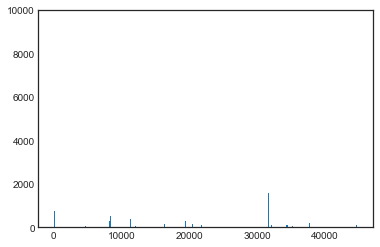

In [485]:
%time
vect2 = CountVectorizer(tokenizer=mecab_tokenizer).fit(X)
count2 = cv2.toarray().sum(axis=0)

idx = np.argsort(-count)
count = count2[idx]
feature_name = np.array(vect2.get_feature_names())[idx]
plt.bar(range(len(count)), count)
plt.ylim(0, 10000)
plt.show()

In [486]:
pprint(list(zip(feature_name, count)))

[('!!!!!!!!!!!!!!!!!!!!!!!!!/SY', 13),
 ('!!!!!!!!!!!!!!!!!!!!!!!!/SY', 1),
 ('!!!!!!!!!!!!!!!!!!!!!!!!♥/SY', 1),
 ('!!!!!!!!!!!!!!!!!!!!!!!/SY', 1),
 ('!!!!!!!!!!!!!!!!!!!!!!/SY', 2),
 ('!!!!!!!!!!!!!!!!!!!!!/SY', 1),
 ('!!!!!!!!!!!!!!!!!!!!/SY', 2),
 ('!!!!!!!!!!!!!!!!!!!/SY', 1),
 ('!!!!!!!!!!!!!!!!!/SY', 1),
 ('!!!!!!!!!!!!!!!!/SY', 3),
 ('!!!!!!!!!!!!!!!!♡♡/SY', 1),
 ('!!!!!!!!!!!!!!!/SY', 2),
 ('!!!!!!!!!!!!!!/SY', 5),
 ('!!!!!!!!!!!!!/SY', 2),
 ('!!!!!!!!!!!!/SY', 5),
 ('!!!!!!!!!!!!~~~~~~♡♡♡♡/SY', 1),
 ('!!!!!!!!!!!.../SY', 1),
 ('!!!!!!!!!!!/SY', 5),
 ('!!!!!!!!!!!?!!/SY', 1),
 ('!!!!!!!!!!!^^/SY', 1),
 ('!!!!!!!!!!/SY', 10),
 ('!!!!!!!!!!♡/SY', 1),
 ('!!!!!!!!!/SY', 10),
 ('!!!!!!!!/SY', 23),
 ('!!!!!!!/SY', 26),
 ('!!!!!!!~~~~/SY', 1),
 ('!!!!!!/SY', 48),
 ('!!!!!!?!!/SY', 1),
 ('!!!!!!^^/SY', 2),
 ('!!!!!!♡!♡!!♡!♡!♡!!/SY', 1),
 ('!!!!!!♡♡♡/SY', 1),
 ('!!!!!/SY', 81),
 ('!!!!!^^/SY', 1),
 ('!!!!!~~~~~/SY', 1),
 ('!!!!!♥/SY', 1),
 ('!!!!!♥♥♥♥/SY', 2),
 ('!!!!!♥♥♥♥♥/SY', 1),
 

 ('82016/SN', 1),
 ('8208/SN', 1),
 ('8276/SN', 1),
 ('8282/SN', 1),
 ('8259/SN', 2),
 ('8224/SN', 1),
 ('823/SN', 2),
 ('8225/SN', 1),
 ('823071/SN', 1),
 ('82828282/SN', 1),
 ('83/SN', 9),
 ('830/SN', 1),
 ('8340/SN', 1),
 ('83402/SN', 1),
 ('840/SN', 1),
 ('84/SN', 6),
 ('8397/SN', 1),
 ('836/SN', 1),
 ('837/SN', 2),
 ('8392/SN', 1),
 ('848/SN', 1),
 ('8484/SN', 1),
 ('8467813/SN', 1),
 ('841056/SN', 1),
 ('84000/SN', 1),
 ('8400/SN', 2),
 ('8461/SN', 1),
 ('8521/SN', 1),
 ('8486/SN', 1),
 ('85/SN', 11),
 ('850/SN', 2),
 ('8500/SN', 2),
 ('851/SN', 3),
 ('853/SN', 1),
 ('859/SN', 1),
 ('86/SN', 5),
 ('861191/SN', 1),
 ('8622/SN', 1),
 ('870/SN', 1),
 ('87000/SN', 1),
 ('87/SN', 9),
 ('866486/SN', 1),
 ('866367/SN', 1),
 ('865279/SN', 1),
 ('864/SN', 1),
 ('8758/SN', 1),
 ('876/SN', 8),
 ('8769/SN', 1),
 ('8770/SN', 1),
 ('8888/SN', 1),
 ('888/SN', 2),
 ('88764210/SN', 1),
 ('886134/SN', 1),
 ('88/SN', 6),
 ('8800/SN', 4),
 ('880/SN', 1),
 ('88888/SN', 1),
 ('8799/SN', 1),
 ('8830/SN

 ('goooooooooooooood/SL', 2),
 ('gooooooooooooood/SL', 1),
 ('gooooooooooood/SL', 1),
 ('goooooooooood/SL', 1),
 ('goooooooooooood/SL', 3),
 ('gooooooooodddd/SL', 1),
 ('goooooooood/SL', 3),
 ('goooooooogle/SL', 1),
 ('gooooooood/SL', 3),
 ('goooooood/SL', 3),
 ('gooooooooood/SL', 5),
 ('hair/SL', 1),
 ('had/SL', 8),
 ('hai/SL', 1),
 ('haha/SL', 3),
 ('hagnojam/SL', 1),
 ('hag/SL', 1),
 ('hacks/SL', 1),
 ('gyro/SL', 1),
 ('hack/SL', 3),
 ('ha/SL', 20),
 ('h/SL', 38),
 ('gyroscope/SL', 2),
 ('gx/SL', 6),
 ('haizzzzzzzzzzzz/SL', 1),
 ('hacking/SL', 1),
 ('hala/SL', 2),
 ('handphone/SL', 1),
 ('halfou/SL', 1),
 ('guys/SL', 18),
 ('handy/SL', 9),
 ('handle/SL', 5),
 ('hand/SL', 1),
 ('hancom/SL', 1),
 ('han/SL', 1),
 ('hams/SL', 1),
 ('hampton/SL', 1),
 ('hampering/SL', 1),
 ('hammer/SL', 1),
 ('hamham/SL', 1),
 ('ham/SL', 2),
 ('hallo/SL', 1),
 ('hallelujah/SL', 1),
 ('hall/SL', 1),
 ('half/SL', 2),
 ('guy/SL', 1),
 ('green/SL', 5),
 ('gustaria/SL', 1),
 ('greeder/SL', 1),
 ('greens/SL', 

 ('sidetouch/SL', 1),
 ('short/SL', 8),
 ('shortcut/SL', 1),
 ('shortly/SL', 1),
 ('shot/SL', 4),
 ('should/SL', 20),
 ('shouldn/SL', 1),
 ('show/SL', 18),
 ('showing/SL', 4),
 ('shown/SL', 2),
 ('shows/SL', 15),
 ('shrink/SL', 1),
 ('shrinks/SL', 1),
 ('shu/SL', 1),
 ('shut/SL', 6),
 ('shuts/SL', 3),
 ('shutting/SL', 1),
 ('shve/SL', 1),
 ('shwin/SL', 1),
 ('shybear/SL', 1),
 ('si/SL', 2),
 ('sibal/SL', 1),
 ('sibar/SL', 2),
 ('sick/SL', 2),
 ('side/SL', 4),
 ('sidesync/SL', 1),
 ('shop/SL', 7),
 ('sense/SL', 1),
 ('sentence/SL', 4),
 ('send/SL', 9),
 ('saying/SL', 4),
 ('says/SL', 8),
 ('sb/SL', 4),
 ('sbi/SL', 2),
 ('sbjtime/SL', 1),
 ('sbs/SL', 32),
 ('sbscnbc/SL', 1),
 ('sc/SL', 6),
 ('scale/SL', 1),
 ('scam/SL', 2),
 ('scammer/SL', 1),
 ('saw/SL', 1),
 ('scammers/SL', 1),
 ('scania/SL', 1),
 ('scared/SL', 1),
 ('scenario/SL', 1),
 ('scence/SL', 1),
 ('sceneries/SL', 1),
 ('schedule/SL', 12),
 ('scheme/SL', 1),
 ('schlechte/SL', 1),
 ('school/SL', 2),
 ('science/SL', 1),
 ('scient

 ('ㅋㅋ궁금하면/UNKNOWN', 1),
 ('ㅋㅋㅋ회원가입좀/UNKNOWN', 1),
 ('ㅋㅋ값이ㅋㅋ/UNKNOWN', 1),
 ('ㅋㅋ그냥/UNKNOWN', 1),
 ('ㅋㅋ다행이다/UNKNOWN', 1),
 ('ㅋㅋ그사람이랑/UNKNOWN', 1),
 ('ㅋㅋ대박/UNKNOWN', 1),
 ('ㅋㅋ돈/UNKNOWN', 1),
 ('ㅋㅋㅋ화나네요/UNKNOWN', 1),
 ('ㅋㅋ대단하시다/UNKNOWN', 1),
 ('ㅋㅋ답장오니까/UNKNOWN', 1),
 ('ㅋㅋ답도없는/UNKNOWN', 1),
 ('ㅋㅋ다운진짜/UNKNOWN', 1),
 ('ㅋㅋ다만/UNKNOWN', 1),
 ('ㅋㅋ님들이/UNKNOWN', 1),
 ('ㅋㅋ놔/UNKNOWN', 1),
 ('ㅋㅋ노블레스웹툰/UNKNOWN', 1),
 ('ㅋㅋ네트워크/UNKNOWN', 1),
 ('ㅋㅋ넘흐/UNKNOWN', 1),
 ('ㅋㅋ넘잼있고/UNKNOWN', 1),
 ('ㅋㅋ너무/UNKNOWN', 3),
 ('ㅋㅋ내정보쏙/UNKNOWN', 1),
 ('ㅋㅋ내일/UNKNOWN', 1),
 ('ㅋㅋ난리네뇬/UNKNOWN', 1),
 ('ㅋㅋ나는/UNKNOWN', 1),
 ('ㅋㅋ꿀잼/UNKNOWN', 2),
 ('ㅋㅋ꽉차면/UNKNOWN', 1),
 ('ㅋㅋ꼭영어못하는놈들이/UNKNOWN', 1),
 ('ㅋㅋ깔았당/UNKNOWN', 1),
 ('ㅋㅋ기존/UNKNOWN', 1),
 ('ㅋㅋ기대되요/UNKNOWN', 1),
 ('ㅋㅋ기가찬다/UNKNOWN', 1),
 ('ㅋㅋ금나게/UNKNOWN', 1),
 ('ㅋㅋ근데/UNKNOWN', 3),
 ('ㅋㅋ그후로는/UNKNOWN', 1),
 ('ㅋㅋ그냥다허휘진짜믿지마라할짓이없어서/UNKNOWN', 1),
 ('ㅋㅋㅋ혼자/UNKNOWN', 1),
 ('ㅋㅋㅋ움짤처럼막/UNKNOWN', 1),
 ('ㅋㅋㅋ핸드폰/UNKNOWN', 1),
 ('ㅋㅋㅋ재밌다/UNKNOWN', 1),
 ('ㅋㅋㅋ재미/UNKNOWN', 1),
 ('ㅋㅋㅋ장주임님/UNKNOWN',

 ('강갈래/NNG', 1),
 ('강경/NNG', 1),
 ('강구/NNG', 8),
 ('강국/NNG', 6),
 ('강규/NNG', 1),
 ('강남/NNP', 20),
 ('강남구/NNP', 1),
 ('강남언/NNP', 2),
 ('강만/NNG', 1),
 ('강남역/NNP', 1),
 ('강대국/NNG', 1),
 ('강도/NNG', 15),
 ('강동/NNP+JKG', 2),
 ('강동연/NNP', 1),
 ('강동호/NNP', 1),
 ('강등/NNG', 1),
 ('강력/NNG', 65),
 ('강력/XR', 31),
 ('강력범/NNG', 1),
 ('강력히/MAG', 10),
 ('강렬/XR', 3),
 ('강령/NNG', 4),
 ('강릉/NNP', 7),
 ('강당/NNG', 1),
 ('간다/EC+VV+EF', 3),
 ('갈란다/VV+EF', 3),
 ('간과/NNG', 1),
 ('가담/NNG', 8),
 ('가당/XR', 2),
 ('가독/NNG', 28),
 ('가독/XR', 47),
 ('가독성/NNG', 7),
 ('가동/NNG', 12),
 ('가두/NNG', 2),
 ('가두/VV', 2),
 ('가둬/VV+EC', 2),
 ('가드/NNG', 16),
 ('가드/NNP', 1),
 ('가득/MAG', 113),
 ('가득/NNG', 1),
 ('가달/NNG', 1),
 ('가득차/VV', 1),
 ('가든/NNG', 5),
 ('가디건/NNG', 7),
 ('가디스/NNP', 8),
 ('가디언/NNP', 4),
 ('가뜩이나/MAG', 20),
 ('가라/NNG', 5),
 ('가라/NNP', 1),
 ('가라/VV', 2),
 ('가라앉/VV', 2),
 ('가라함/NNP', 1),
 ('가락/NNG', 1),
 ('가락시장/NNP', 3),
 ('가람/NNP', 1),
 ('가득히/MAG', 1),
 ('가랑/NNG', 1),
 ('가단/NNG', 1),
 ('가다/NNG', 1),
 ('가까워졌/VA+EC+VX+

 ('근황/NNG', 1),
 ('근현/NNG', 1),
 ('근해/NNG', 1),
 ('근친/NNG', 4),
 ('근체/NNG', 1),
 ('근처/NNG', 118),
 ('근질근질/MAG', 1),
 ('근제/NNG', 1),
 ('근접/NNG', 10),
 ('근절/NNG', 1),
 ('근자/NNG', 1),
 ('근인/NNG', 3),
 ('근육질/NNG', 2),
 ('근육/NNG', 16),
 ('근업/NNG', 2),
 ('근심/NNG', 1),
 ('근시/NNG', 2),
 ('근성/NNG', 7),
 ('근사/XR', 3),
 ('근본/NNG', 11),
 ('근방/NNG', 3),
 ('근무지/NNG', 1),
 ('근무/NNG', 27),
 ('근린공원/NNG', 1),
 ('근로자/NNG', 1),
 ('귾겨/UNKNOWN', 1),
 ('귾김상태보완요청/UNKNOWN', 1),
 ('귿/UNKNOWN', 1),
 ('글/NNG', 1383),
 ('글쓴이/NNG', 4),
 ('글쓰기/NNG', 15),
 ('글쎄요/IC', 9),
 ('글쎄다/IC', 1),
 ('글쎄/NNG', 3),
 ('글쎄/IC', 5),
 ('글시/NNG', 7),
 ('글서/MAJ', 1),
 ('글면/MAJ', 1),
 ('글마루/NNG', 1),
 ('글루/MAG', 1),
 ('글로벌/NNG', 29),
 ('그리하/VV', 1),
 ('글로리/NNP', 1),
 ('글렀/VA+EP', 1),
 ('글러/VA+EC', 5),
 ('글램/NNP', 4),
 ('글래스/NNP', 1),
 ('글라스/NNG', 2),
 ('글꼴/NNG', 31),
 ('글귀/NNG', 12),
 ('글구/NNG', 1),
 ('글구/MAJ', 46),
 ('글고/MAJ', 61),
 ('글/VV', 17),
 ('글/VA', 6),
 ('글렀/VV+EP', 2),
 ('그게/NP+JKS', 267),
 ('그리핀/NNG', 1),
 ('그리즈/NNP', 2),
 ('

 ('내마/NNG', 1),
 ('내막/NNG', 1),
 ('내말이/NP+JKG+NNG+JKS', 1),
 ('내맘대로/NP+JKG+NNG+JX', 5),
 ('내면/NNG', 14),
 ('내명/NNG', 2),
 ('내모/NNG', 2),
 ('내모/VV', 1),
 ('내보냄/VV+ETN', 1),
 ('내몰/VV+ETM', 1),
 ('내밀/VV', 3),
 ('내받/VV', 8),
 ('내뱉/VV', 2),
 ('내버려/VV+EC', 5),
 ('내보/VV', 5),
 ('내보내/VV', 63),
 ('내보내/VV+EC', 2),
 ('내보낸/VV+ETM', 2),
 ('내민/VV+ETM', 1),
 ('내트/NNP', 1),
 ('내시/NNG', 1),
 ('내신/NNG', 1),
 ('내정/NNG', 1),
 ('내제/NNG', 1),
 ('내주/NNG', 2),
 ('내주/VV', 41),
 ('내준/VV+ETM', 2),
 ('내줄/VV+ETM', 1),
 ('내줌/VV+ETN', 2),
 ('내줍니다/VV+EF', 1),
 ('내재/NNG', 1),
 ('내줘/VV+EC', 1),
 ('내지/MAJ', 4),
 ('내지/NNG', 4),
 ('내진/NNG', 2),
 ('내쫓/VV', 1),
 ('내차/NNG', 6),
 ('내차/VV', 1),
 ('내참/IC', 2),
 ('내참/NNG', 1),
 ('내줬/VV+EP', 4),
 ('내시경/NNG', 6),
 ('내장/NNG', 34),
 ('내일/MAG', 57),
 ('내실/NNG', 3),
 ('내심/NNG', 3),
 ('내야/NNG', 28),
 ('내야수/NNG', 1),
 ('내역/NNG', 514),
 ('내염/NNG', 2),
 ('내영/NNG', 4),
 ('내왔/VV+EP', 1),
 ('내일/NNG', 77),
 ('내외/NNG', 5),
 ('내용/NNG', 979),
 ('내용물/NNG', 11),
 ('내용증명/NNP', 1),
 ('내원/NNG', 2),
 

 ('됏다고/UNKNOWN', 1),
 ('됏다고지네멋대로/UNKNOWN', 1),
 ('되팔/VV', 1),
 ('되파/VV', 4),
 ('되찾/VV', 4),
 ('되짚/VV', 3),
 ('되야지/NNG', 2),
 ('되수/NNG', 1),
 ('되새김/NNG', 1),
 ('되새길/VV+ETM', 1),
 ('되팔/VV+ETM', 1),
 ('되살아나/VV', 2),
 ('되살려서/VV+EC', 1),
 ('되살려/VV+EC', 2),
 ('되묻/VV', 2),
 ('되먹/VV', 1),
 ('되려/MAG', 5),
 ('되돌이표/NNG', 1),
 ('되돌아와서/VV+EC', 1),
 ('되돌아와/VV+EC', 1),
 ('되살리/VV', 2),
 ('되돌아옵니다/VV+EF', 1),
 ('되풀이/NNG', 5),
 ('된/VV', 9),
 ('된다구요/VV+EC', 4),
 ('된다구/XSV+EC', 1),
 ('된다구/VV+EC', 3),
 ('된다고요/VV+EF', 7),
 ('된다고/XSV+EF', 3),
 ('된다고/XSV+EC', 84),
 ('된다고/VV+EF', 12),
 ('된다고/VV+EC', 449),
 ('됙/UNKNOWN', 1),
 ('된다거나/XSV+EC', 1),
 ('된다/XSV+EF', 50),
 ('된다/XSV+EC', 38),
 ('된다/VV+EF', 142),
 ('된다/VV+EC', 204),
 ('된가/XSA+EF', 1),
 ('된/XSV+ETM', 1392),
 ('된/XSV', 1),
 ('된/VV+ETM', 1030),
 ('된다거나/VV+EC', 4),
 ('동화/NNG', 40),
 ('되돌아온/VV+ETM', 1),
 ('되돌아볼/VV+ETM', 1),
 ('됐으면/XSA+EP+EC', 1),
 ('됐으니/XSV+EP+EC', 1),
 ('됐으니/VV+EP+EC', 2),
 ('됐으나/VV+EP+EC', 1),
 ('됐었/XSV+EP', 7),
 ('됐었/VV+EP', 52),
 ('됐/XSV+

 ('다한다/VV+EF', 1),
 ('다한/VV+ETM', 1),
 ('다하나/NNG', 1),
 ('다핵/NNG', 1),
 ('다툴/VV+ETM', 2),
 ('닥달/NNG', 1),
 ('닥쳐/VV+EC', 2),
 ('단개/NNG', 2),
 ('단강/NNG', 1),
 ('단간/NNG', 1),
 ('단가/NNG+VCP+EC', 5),
 ('단가/NNG', 9),
 ('단/VA+ETM', 9),
 ('단/NNG', 15),
 ('단/NNBC', 16),
 ('닥지/NNG', 1),
 ('단/MM', 175),
 ('단/ETM', 117),
 ('단/EC', 4),
 ('닦인/VV+ETM', 1),
 ('닦이/VV', 1),
 ('닦/VV', 17),
 ('닦/NNG', 2),
 ('닥터/NNG', 6),
 ('닥치/VV', 7),
 ('단/MAJ', 21),
 ('다방면/NNG', 4),
 ('다킨/NNP', 1),
 ('다크서클/NNG', 1),
 ('다지르/VV', 1),
 ('다지/VV', 1),
 ('다지/NNP', 1),
 ('다지/EF', 1),
 ('다지/EC', 2),
 ('다중/NNG', 21),
 ('다죠/EF', 4),
 ('다죠/EC', 4),
 ('다지만/EC', 9),
 ('다죄/NNG', 1),
 ('다제/NNG', 1),
 ('다정다감/XR', 2),
 ('다전/NNG', 1),
 ('다재다능/XR', 1),
 ('다재다능/NNG', 1),
 ('다재/NNG', 2),
 ('다잖아요/EC', 2),
 ('다잖아/EF', 1),
 ('다조/NNG', 1),
 ('다키니/NNP', 2),
 ('다지요/EF', 1),
 ('다짐/NNG', 11),
 ('다크독/NNP', 6),
 ('다크/NNP', 3),
 ('다크/NNG', 21),
 ('다큐/NNP', 3),
 ('다카요/NNP', 1),
 ('다카노/NNP', 1),
 ('다친/VV+ETM', 1),
 ('다치/VV', 4),
 ('다진/VV+ETM', 1),
 ('다추

 ('던데/VCP+EC', 11),
 ('던데/EF', 162),
 ('던데/EC', 408),
 ('던디/EF', 2),
 ('덤프트럭/NNG', 5),
 ('덥/NNP', 1),
 ('덥/VA', 1),
 ('데려와/VV+EC+VX+EC', 1),
 ('데려오/VV', 1),
 ('데려다/VV+EC', 2),
 ('데려갔/VV+EP', 1),
 ('데려갈/VV+ETM', 1),
 ('데려가/VV+EC', 1),
 ('데려가/VV', 1),
 ('데드엔드/NNG', 3),
 ('데로/JX', 30),
 ('데드볼/NNG', 2),
 ('데되/VV', 1),
 ('데데/XR', 1),
 ('데님/NNG', 2),
 ('데닉/NNP', 1),
 ('데니얼/NNP', 1),
 ('데네브/NNG', 2),
 ('데넘/NNP', 2),
 ('데나/NNP', 2),
 ('데드/NNG', 2),
 ('데기/NNG', 17),
 ('데롱/NNP', 1),
 ('데르/NNP', 2),
 ('데스/NNP', 1),
 ('댄/VX+ETM', 1),
 ('데스/NNG', 8),
 ('데스노트/NNG', 1),
 ('데상트/NNP', 1),
 ('데살로니가/NNG', 2),
 ('데비/NNP', 2),
 ('데브/NNP', 4),
 ('데루/NNP', 1),
 ('데뷔/NNG', 2),
 ('데미지/NNP', 43),
 ('데미갓/NNP', 2),
 ('데미/NNP', 1),
 ('데몬/NNP', 3),
 ('데몬/NNG+JX', 4),
 ('데모/NNG', 16),
 ('데마/NNG', 1),
 ('데리/VV', 18),
 ('데본/NNG', 1),
 ('덕/NNG', 202),
 ('데굴데굴/MAG', 1),
 ('데/VCP+EC', 5),
 ('덩이/NNG', 1),
 ('덩어리/NNG', 12),
 ('덩실덩실/MAG', 1),
 ('덩덩/MAG', 1),
 ('덩달/VV', 4),
 ('덩그러니/MAG', 3),
 ('덩그러/VV', 2),
 ('덩/NNG', 5),
 (

 ('옷/EC', 6),
 ('옶어요/UNKNOWN', 1),
 ('옶는/UNKNOWN', 2),
 ('옶네요/UNKNOWN', 1),
 ('옶/UNKNOWN', 1),
 ('옵티머스/NNP', 9),
 ('옵시/EP', 1),
 ('옵시/EC', 1),
 ('옵션/NNG', 228),
 ('옵니다/VX+EF', 13),
 ('옵니다/VX+EC', 6),
 ('옹/MAG', 6),
 ('와글와글/MAG', 1),
 ('옹/NNB', 5),
 ('옹개/NNP', 1),
 ('와/VV+EF', 67),
 ('와/VV+EC', 304),
 ('와/VV', 3),
 ('와/NNP', 3),
 ('와/NNG', 4),
 ('와/JKB', 512),
 ('와/JC', 1587),
 ('와/IC', 669),
 ('와/EC', 6),
 ('옿다/UNKNOWN', 1),
 ('옾챗정지/UNKNOWN', 1),
 ('옹호/NNG', 1),
 ('옹졸/XR', 1),
 ('옹알옹알/MAG', 1),
 ('옹알거리/VV', 1),
 ('옹달샘/NNG', 1),
 ('옹금/NNG', 1),
 ('옹/NNG', 24),
 ('와이/NNP', 1),
 ('와이드/NNG', 1),
 ('와이드/NNP', 4),
 ('완절/NNG', 1),
 ('완전히/MAG', 62),
 ('완전체/NNG', 4),
 ('완전열/NNP', 1),
 ('완전/NNG', 796),
 ('완전/MAG', 1042),
 ('완적/NNG', 1),
 ('완저/NNG', 3),
 ('완수/NNG', 4),
 ('완소/NNG', 6),
 ('완성도/NNG', 38),
 ('완성/NNG', 73),
 ('완벽히/MAG', 12),
 ('완벽/NNG', 335),
 ('완만/XR', 1),
 ('완마/NNG', 1),
 ('완료시/NNG', 1),
 ('완제품/NNG', 1),
 ('완료/NNG', 366),
 ('완존/NNG', 19),
 ('완충/NNG', 6),
 ('왓슨/NNP', 4),
 ('왓/VV+EP',

 ('었었/EP', 31),
 ('었/VV', 3),
 ('었/EP', 7429),
 ('엇지/MAG', 1),
 ('엇보/NNG', 1),
 ('엇다/NP', 1),
 ('엇다/EC', 3),
 ('엇갈린다/VV+EF', 2),
 ('엇갈린/VV+ETM', 1),
 ('엇갈리/VV', 3),
 ('엇/NNG', 5),
 ('엇/IC', 8),
 ('엇/EP', 310),
 ('엇/EC', 11),
 ('엉/IC', 12),
 ('엉/NNG', 10),
 ('엉덩국/NNP', 1),
 ('엉덩이/NNG', 8),
 ('엌ㅋㅋ/UNKNOWN', 1),
 ('엌ㅋ/UNKNOWN', 4),
 ('엌/UNKNOWN', 2),
 ('엊그제/NNG', 5),
 ('엊그제/MAG', 3),
 ('엊그저께/MAG', 1),
 ('엊/EP', 1),
 ('엉터리/NNG', 32),
 ('에도/NNP', 1),
 ('엉키/VV', 3),
 ('엉클/NNP', 1),
 ('엉엉엉/IC', 2),
 ('엉엉/MAG', 6),
 ('엉성/XR', 8),
 ('엉망진창/NNG', 19),
 ('엉망/NNG', 163),
 ('엉망/MAG', 13),
 ('엉뚱/XR', 54),
 ('엉클/VV+ETM', 2),
 ('엘릭/NNP', 6),
 ('어린이날/NNP', 1),
 ('어린애/NNG', 8),
 ('야스쿠니/NNG', 1),
 ('야스오/NNG', 1),
 ('야수/NNP', 1),
 ('야수/NNG', 3),
 ('야속/NNG', 1),
 ('야설록/NNP', 1),
 ('야설/NNG', 4),
 ('야생화/NNG', 1),
 ('야생/NNG', 1),
 ('야상/NNG', 2),
 ('야사/NNG', 1),
 ('야비/XR', 1),
 ('야밤/NNG', 1),
 ('야박/XR', 4),
 ('야미/NNG', 1),
 ('야물/VV', 1),
 ('야메/NNP', 1),
 ('야스키/NNP', 1),
 ('야머/NNP', 1),
 ('야시경/NNG', 1),
 ('야심/NN

 ('지나/VV+EC', 88),
 ('지나/VV', 253),
 ('지나/NNP', 4),
 ('지나/EC', 7),
 ('지끔/MAG', 1),
 ('지껄이/VV', 1),
 ('지껄/XR', 1),
 ('지기가/EC+VX+ETN+JKS', 1),
 ('지기/VV', 1),
 ('지기/NNG', 8),
 ('지나온/VV+ETM', 1),
 ('지고/EC', 12),
 ('지겹/VA', 24),
 ('지/VX+EP+EF', 5),
 ('지/VX+EC', 3),
 ('지/VX', 2528),
 ('지/VV', 185),
 ('지/VCP+EF', 324),
 ('지/VCP+EC', 214),
 ('지/NP', 154),
 ('지/NNP', 69),
 ('지/NNG', 57),
 ('지/NNB', 240),
 ('지/MM', 33),
 ('지/EF', 675),
 ('지/EC', 10261),
 ('즣은게/UNKNOWN', 1),
 ('즣은/UNKNOWN', 1),
 ('즣아요/UNKNOWN', 1),
 ('증후군/NNG', 1),
 ('지/VX+ETM', 21),
 ('지경/NNB', 38),
 ('지/XR', 2),
 ('지/XSA+EC', 1),
 ('지겨웠/VA+EP', 2),
 ('지겨워하/VV', 1),
 ('지겨워서/VA+EC', 3),
 ('지겨워/VA+EC', 19),
 ('지겨울/VA+ETM', 2),
 ('지겨운/VA+ETM', 4),
 ('지게차/NNG', 5),
 ('지게/NNG', 3),
 ('지검/NNG', 1),
 ('지개/NNG', 22),
 ('지갑/NNG', 66),
 ('지감/NNG', 1),
 ('지갈/NNG', 1),
 ('지간/NNG', 5),
 ('지각/NNG', 12),
 ('지가/EC+JKS', 14),
 ('지/XSV+EC', 21),
 ('지/XSA', 2),
 ('지나쳐/VV+EC', 3),
 ('지나쳐서/VV+EC', 2),
 ('지나쳤/VV+EP', 4),
 ('지려/NNG', 8),
 ('지레짐작/NNG',

 ('으면서도/EC', 1),
 ('으면서/EF', 2),
 ('으면서/EC', 184),
 ('으면/EF', 97),
 ('으면/EC', 5896),
 ('으며/EC', 123),
 ('으먼/EC', 3),
 ('으마/EF', 1),
 ('으리으리/XR', 1),
 ('으리으리/MAG', 1),
 ('으리란/ETM', 1),
 ('으리라/EC', 7),
 ('으리니/EC', 1),
 ('으리/EP', 1),
 ('으리/EC', 2),
 ('으름장/NNG', 1),
 ('으르/MAG', 2),
 ('으므로/EC', 13),
 ('으려니까/EC', 6),
 ('으려는데/EC', 2),
 ('으라면서/EC', 3),
 ('으라면/EC', 1),
 ('으라든/EC', 1),
 ('으라더군/EC', 1),
 ('으라니/EC', 3),
 ('으라는지/EC', 1),
 ('으라는데/EC', 16),
 ('으라는/ETM', 56),
 ('으라네/EF', 3),
 ('으라구/EC', 2),
 ('으라고/EF', 9),
 ('으라고/EC', 116),
 ('으라/EC', 32),
 ('으뜸/NNG', 14),
 ('으다/JKB', 14),
 ('으다/EF', 11),
 ('으니만큼/EC', 1),
 ('으라이/EC', 1),
 ('으려니/EC', 20),
 ('으라지요/EF', 1),
 ('으란/ETM', 12),
 ('으려는/ETM', 36),
 ('으려나/EF', 2),
 ('으려나/EC', 6),
 ('으려구요/EF', 1),
 ('으려구/EC', 5),
 ('으려고/EF', 1),
 ('으려고/EC', 195),
 ('으려/EC', 51),
 ('으레/EC', 1),
 ('으러/EC', 56),
 ('으랴/EF', 2),
 ('으랴/EC', 2),
 ('으랜다/EF', 2),
 ('으래서/EC', 10),
 ('으래/EF', 2),
 ('으래/EC', 3),
 ('으란다/EF', 2),
 ('으란/EC', 1),
 ('으믄/EC', 5),
 ('으세/EF', 4),
 

 ('물선/NNG', 1),
 ('물색/NNG', 1),
 ('물뿌리/NNG', 1),
 ('물빛/NNG', 1),
 ('물보/NNP', 1),
 ('물병/NNG', 2),
 ('물물/NNG', 1),
 ('물명/NNG', 2),
 ('물망/NNG', 1),
 ('물맛/NNG', 1),
 ('물리학/NNG', 1),
 ('뭉게지/VV', 1),
 ('뭉겨짐/UNKNOWN', 1),
 ('뭉님들과교류하고/UNKNOWN', 1),
 ('뭣하러/NP+VV+EC', 11),
 ('뭣/XR', 1),
 ('뭣/NP', 48),
 ('뭣/IC', 1),
 ('뭡니까/NP+VCP+EF', 131),
 ('뭡니까/NP+VCP+EC', 37),
 ('뭡니가/UNKNOWN', 1),
 ('뭠니까/UNKNOWN', 4),
 ('뭘로/NP+JKB', 10),
 ('뭘까요/NP+VCP+EF', 34),
 ('뭘까/NP+VCP+EF', 9),
 ('뭘까/NP+VCP+EC', 2),
 ('뭘/NP+JKO', 486),
 ('뭔진/NP+VCP+EC+JX', 4),
 ('뭔지/NP+VCP+EF', 31),
 ('뭔지/NP+VCP+EC', 183),
 ('뭔줄/NP+JX+NNB', 2),
 ('뭥미/UNKNOWN', 15),
 ('뭔디/NP+VCP+EF', 1),
 ('뭥밍/UNKNOWN', 1),
 ('뭫어떡해하라는거임/UNKNOWN', 1),
 ('뮙니까차리리주질말지다복구해주세요/UNKNOWN', 1),
 ('뮙니까/UNKNOWN', 3),
 ('뮐까요/UNKNOWN', 1),
 ('뮌지통알수가업네/UNKNOWN', 1),
 ('뮌가요/UNKNOWN', 2),
 ('뮌/UNKNOWN', 1),
 ('뮈하러/UNKNOWN', 1),
 ('뮈이런개떡같은최악의어플이있지/UNKNOWN', 1),
 ('뮈에요/UNKNOWN', 1),
 ('뮈야/UNKNOWN', 1),
 ('뮈소/NNP', 1),
 ('뮈당/UNKNOWN', 1),
 ('뮈니뭐니해도/UNKNOWN', 1),
 ('뮈꼬/UNKNOW

 ('맛없/VA', 3),
 ('맛사/NNP', 1),
 ('맛볼/VV+ETM', 2),
 ('맛보기/NNG', 5),
 ('맛보/VV', 15),
 ('맛난/VA+ETM', 3),
 ('맛나/VA+EC', 1),
 ('맛나/VA', 4),
 ('맛없이/MAG', 1),
 ('매우/MAG', 937),
 ('마소/NNG', 3),
 ('마셔요/VX+EP+EC', 5),
 ('류질/NNG', 1),
 ('류지혁/NNP', 1),
 ('류소/NNG', 1),
 ('류백현/NNP', 1),
 ('류리/NNG', 1),
 ('류로/NNG', 2),
 ('류량/NNG', 4),
 ('류/XSN', 63),
 ('류/XR', 1),
 ('류/NNP', 2),
 ('류/NNG', 21),
 ('류/EC', 48),
 ('뤼/NNP', 1),
 ('뤱/UNKNOWN', 1),
 ('뤠있하네/UNKNOWN', 1),
 ('뤠잇한/UNKNOWN', 1),
 ('뤠잇/UNKNOWN', 13),
 ('류현진/NNP', 1),
 ('뤟게/UNKNOWN', 1),
 ('륙/NR', 1),
 ('륜데/XSN+VCP+EC', 1),
 ('른건/UNKNOWN', 1),
 ('른거더만이많들어올려주삼/UNKNOWN', 1),
 ('른거같아요/UNKNOWN', 1),
 ('른/UNKNOWN', 15),
 ('륵/NNG', 5),
 ('르바/NNP', 1),
 ('르면/EC', 5),
 ('르누/NNP', 3),
 ('르노삼성/NNP', 1),
 ('르노/NNP', 3),
 ('르네/NNP', 1),
 ('르고/NNP', 1),
 ('르/NNP', 16),
 ('르/NNG', 79),
 ('륭/NNP', 2),
 ('륨/NNP', 3),
 ('률/XSN', 251),
 ('륜/XSN+VCP+ETM', 4),
 ('른건다봣고/UNKNOWN', 1),
 ('뤈/UNKNOWN', 1),
 ('룻/NNG', 3),
 ('루팅/NNP', 176),
 ('루틴/NNG', 2),
 ('루트/NNG', 131)

 ('손주/NNG', 3),
 ('손절/NNG', 1),
 ('손전등/NNG', 12),
 ('손재주/NNG', 4),
 ('손잡이/NNG', 8),
 ('손자/NNG', 2),
 ('솔깃/XR', 1),
 ('손보/VV', 4),
 ('손바닥/NNG', 3),
 ('속히/VV', 1),
 ('속히/MAG', 18),
 ('속하/VV', 10),
 ('속편/NNG', 8),
 ('속터지/VV', 17),
 ('속출/NNG', 4),
 ('속초/NNP', 1),
 ('속초/NNG', 1),
 ('속진/NNG', 1),
 ('속지/NNG', 4),
 ('속임/VV+ETN', 1),
 ('속인/VV+ETM', 3),
 ('속이/VV', 11),
 ('속옷/NNG', 5),
 ('속였/VV+EP', 1),
 ('속여서/VV+EC', 3),
 ('속여도/VV+EC', 1),
 ('손/EC', 3),
 ('손발/NNG', 1),
 ('손/NNG', 375),
 ('손길/NNG', 9),
 ('손목/NNG', 5),
 ('손맛/NNG', 9),
 ('손들/VV', 2),
 ('손드/VV', 1),
 ('손댈/VV+ETM', 1),
 ('손대/VV', 4),
 ('손대/NNG', 1),
 ('손님상/NNG', 1),
 ('손님/NNG', 17),
 ('손놓/VV', 5),
 ('손노리/NNP', 2),
 ('손녀/NNG', 1),
 ('손난로/NNG', 4),
 ('손나은/NNP', 2),
 ('손끝/NNG', 1),
 ('손꼽히/VV', 1),
 ('손꼽/VV', 3),
 ('손가락/NNG', 88),
 ('솔까말/MAG', 1),
 ('솔드/NNP', 5),
 ('솔라/NNP', 1),
 ('솤ㅋㅋㅋㅋㅋㅋㅋㅋㅋ/UNKNOWN', 1),
 ('송편/NNG', 2),
 ('송파구/NNP', 1),
 ('송파/NNP', 1),
 ('송출/NNG', 4),
 ('송추/NNG', 1),
 ('송창무/NNP', 1),
 ('송지연/NNP', 2),
 ('송지/NNG', 1),
 (

 ('시내버스/NNG', 2),
 ('시내/NNG', 6),
 ('시낭/NNG', 1),
 ('시난/NNP', 1),
 ('시나리오/NNG', 41),
 ('시나리/NNP', 2),
 ('시끄럽/VA', 6),
 ('시끄러워서/VA+EC', 1),
 ('시끄러워/VA+EC', 3),
 ('시끄러울/VA+ETM', 1),
 ('시끄러운/VA+ETM', 1),
 ('시기상조/NNG', 1),
 ('시기/NNG', 71),
 ('시급히/MAG', 9),
 ('시급/XR', 69),
 ('시급/NNG', 12),
 ('시금치/NNG', 2),
 ('시너지/NNG', 5),
 ('시그널/NNG', 6),
 ('시네/VV+EP+EC', 2),
 ('시논/NNP', 1),
 ('시동/NNG', 40),
 ('시도기/NNG', 1),
 ('시도/NNG', 440),
 ('시덥/VA', 1),
 ('시덥/NNG', 1),
 ('시던/VV+EP+ETM', 2),
 ('시댁/NNG', 2),
 ('시대/NNG', 174),
 ('시당/NNG', 2),
 ('시달리/VV', 2),
 ('시달려서/VV+EC', 1),
 ('시달/NNG', 1),
 ('시다/NNP', 2),
 ('시다/EC', 8),
 ('시니컬/NNG', 1),
 ('시는/VV+EP+ETM', 2),
 ('시늉/NNG', 2),
 ('시네마/NNG', 1),
 ('시그/NNP', 1),
 ('시궁창/NNG', 1),
 ('시국/NNG', 1),
 ('시가전/NNG', 1),
 ('시가/NNG', 6),
 ('시/XSN', 165),
 ('시/VCP+EP', 10),
 ('시/VA', 3),
 ('시/NR', 3),
 ('시/NNG', 572),
 ('시/NNB', 1295),
 ('시/EP', 6574),
 ('싖스/UNKNOWN', 1),
 ('싑다/UNKNOWN', 1),
 ('싑고/UNKNOWN', 3),
 ('싑/UNKNOWN', 1),
 ('싄겜이/UNKNOWN', 1),
 ('싀스/UNKNOWN', 1)

 ('살펴봐야/VV+EC+VX', 1),
 ('살펴봐야/VV+EC', 1),
 ('살펴봐도/VV+EC', 1),
 ('살펴봐/VV+EC', 2),
 ('살펴봅시다/VV+EF', 1),
 ('살펴봄/VV+ETN', 1),
 ('살펴볼/VV+ETM', 7),
 ('삼/VV', 48),
 ('삼성몰/NNP', 2),
 ('삼가/NNG', 2),
 ('삼가/VV+EC', 1),
 ('삼성/NNG', 1),
 ('삼생/NNG', 1),
 ('삼상/NNG', 1),
 ('삼산동/NNP', 1),
 ('삼배/NNG', 1),
 ('삼방동/NNP', 1),
 ('삼면/NNG', 1),
 ('삼류/NNG', 5),
 ('삼두육비/NNG', 1),
 ('삼도천/NNG', 1),
 ('삼대독자/NNG', 1),
 ('삼국지/NNP', 51),
 ('삼국/NNG', 5),
 ('삼겹살/NNG', 1),
 ('삼각형/NNG', 3),
 ('삼각근/NNG', 1),
 ('삼각/NNG', 1),
 ('삼가/VV', 1),
 ('상/XSN', 252),
 ('상가/NNG', 6),
 ('상각/NNG', 1),
 ('상용/NNG', 4),
 ('상욕/NNG', 1),
 ('상영/NNG', 4),
 ('상업지/NNG', 1),
 ('상업시설/NNP', 2),
 ('상업/NNG', 11),
 ('상어/NNG', 4),
 ('상아/NNG', 1),
 ('상심/NNG', 2),
 ('상실감/NNG', 3),
 ('상실/NNG', 13),
 ('상식/NNG', 46),
 ('상시/NNG', 13),
 ('상승/NNG', 28),
 ('상습범/NNG', 1),
 ('상스러운/VA+ETM', 1),
 ('상술/NNG', 23),
 ('상용구/NNP', 1),
 ('상쇄/NNG', 2),
 ('상용차/NNG', 1),
 ('상위/NNG', 39),
 ('상점가/NNG', 1),
 ('상점/NNG', 111),
 ('상전벽해/NNG', 1),
 ('상저/NNG', 1),
 ('상장/NNG', 6),
 ('

* Stopword 정의

In [546]:
stopword = ['ㄱ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ', '!', '.', ',','/',':', ";", '-', '_', '+', "=", '@', '#', '$', '%', "^", "&", "*", "(", ")", 'ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ','ㅣ','ㅐ', 'ㅒ', 'ㅔ', 'ㅖ', 'ㅃ', 'ㅉ', "ㄸ", "ㄲ", 'ㅆ', '0', '1', '2','3', '4', '5', '6', '7', '8', '9', '.', '하다', '이', '되다', '가', '에', '도', '잇다', '을', '안', '은', '를', '으로', '이', '는']

In [553]:
stopword = [re.findall('[\w]+/punctuation',sw) for sw in twit_tokenizer(X[0])] 

In [547]:
%%time
cv4 = CountVectorizer(tokenizer=twit_tokenizer, stop_words=stopword).fit(X)

CPU times: user 3min 1s, sys: 2.04 s, total: 3min 3s
Wall time: 2min 58s


In [548]:
cv4_ = cv4.transform(X)

In [549]:
count = cv4_.toarray().sum(axis=0)
idx = np.argsort(-count)
count = count[idx]
feature_name = np.array(cv4.get_feature_names())[idx]

In [550]:
pprint(list(zip(feature_name, count)))

[('하다/Verb', 92960),
 ('./Punctuation', 62513),
 ('이/Josa', 42846),
 ('되다/Verb', 36690),
 ('좋다/Adjective', 34777),
 ('가/Josa', 28336),
 ('에/Josa', 25366),
 ('도/Josa', 25233),
 ('있다/Adjective', 24574),
 ('을/Josa', 24043),
 ('안/Noun', 18243),
 ('앱/Noun', 16664),
 ('?/Punctuation', 16326),
 ('../Punctuation', 14971),
 ('은/Josa', 14464),
 ('없다/Adjective', 14172),
 ('를/Josa', 12873),
 ('으로/Josa', 11974),
 ('같다/Adjective', 11931),
 ('이/Determiner', 11821),
 ('는/Josa', 11345),
 ('.../Punctuation', 11110),
 ('보다/Verb', 11013),
 ('너무/Noun', 10804),
 ('로/Josa', 10802),
 ('!/Punctuation', 10507),
 (',/Punctuation', 9754),
 ('들/Suffix', 9724),
 ('안/VerbPrefix', 9631),
 ('어플/Noun', 9610),
 ('만/Josa', 8754),
 ('않다/Verb', 8468),
 ('쓰다/Verb', 8326),
 ('게임/Noun', 8210),
 ('것/Noun', 8176),
 ('좀/Noun', 7780),
 ('아니다/Adjective', 7546),
 ('에서/Josa', 7460),
 ('의/Josa', 7241),
 ('사용/Noun', 7227),
 ('왜/Noun', 7122),
 ('다/Adverb', 7015),
 ('요/Josa', 7013),
 ('나오다/Verb', 6896),
 ('거/Noun', 6767),
 ('~/Punctuati

 ('상당하다/Adjective', 270),
 ('초보/Noun', 270),
 ('사실/Noun', 270),
 ('알바/Noun', 269),
 ('인터페이스/Noun', 269),
 ('안내/Noun', 269),
 ('종류/Noun', 269),
 ('잘만/Noun', 268),
 ('50/Number', 268),
 ('쯤/Suffix', 267),
 ('뿐/Noun', 267),
 ('업체/Noun', 267),
 ('심플/Noun', 267),
 ('만/Suffix', 266),
 ('제거/Noun', 266),
 ('my/Alpha', 266),
 ('계산/Noun', 265),
 ('ㅠㅜ/KoreanParticle', 265),
 ('여기다/Verb', 264),
 ('아래/Noun', 264),
 ('된거/Noun', 263),
 ('뽑다/Verb', 263),
 ('차이/Noun', 263),
 ('땐/Noun', 262),
 ('해지/Noun', 262),
 ('풀다/Verb', 261),
 ('of/Alpha', 261),
 ('티비/Noun', 260),
 ('이안/Noun', 260),
 ('업/Noun', 259),
 ('했지만/Josa', 259),
 ('맛/Noun', 258),
 ('꺼/Suffix', 258),
 ('듭니/Noun', 258),
 ('가족/Noun', 258),
 ('올라가다/Verb', 257),
 ('의/Noun', 257),
 ('수도/Noun', 257),
 ('겠다/Verb', 257),
 ('가계부/Noun', 256),
 ('상세/Noun', 256),
 ('튕겨/Noun', 256),
 ('꾸준하다/Adjective', 256),
 ('추다/Verb', 255),
 ('넘기다/Verb', 254),
 ('^/Punctuation', 254),
 ('여러분/Noun', 254),
 ('훌륭하다/Adjective', 253),
 ('점점/Noun', 253),
 ('단점/Noun', 252),
 

 ('awesome/Alpha', 58),
 ('척/Noun', 58),
 ('닷컴/Suffix', 58),
 ('유효/Noun', 58),
 ('일동/Noun', 58),
 ('개편/Noun', 58),
 ('한장/Noun', 58),
 ('일때/Noun', 58),
 ('볼라/Noun', 58),
 ('sk/Alpha', 58),
 ('운동/Noun', 57),
 ('무난/Noun', 57),
 ('에피소드/Noun', 57),
 ('세련되다/Adjective', 57),
 ('독자/Noun', 57),
 ('깜짝/Noun', 57),
 ('검/Noun', 57),
 ('인천/Noun', 57),
 ('저절로/Noun', 57),
 ('한게임/Noun', 57),
 ('밀리다/Verb', 57),
 ('미연시/Noun', 57),
 ('삼국지/Noun', 57),
 ('경매/Noun', 57),
 ('알찬/Noun', 57),
 ('롤리팝/Noun', 57),
 ('뮤직/Noun', 57),
 ('이어서/Adverb', 57),
 ('가방/Noun', 57),
 ('up/Alpha', 57),
 ('한판/Noun', 57),
 ('much/Alpha', 57),
 ('파워/Noun', 57),
 ('여행자/Noun', 57),
 ('바램/Noun', 57),
 ('페어/Noun', 57),
 ('시간표/Noun', 57),
 ('날때/Noun', 57),
 ('시정/Noun', 57),
 ('움짤/Noun', 57),
 ('니키/Noun', 57),
 ('이정/Noun', 57),
 ('하고도/Josa', 57),
 ('앱임/Noun', 57),
 ('간혹/Noun', 57),
 ('폭/Noun', 57),
 ('필름/Noun', 57),
 ('plz/Alpha', 57),
 ('가하다/Verb', 57),
 ('미성년/Noun', 57),
 ('지나치다/Verb', 57),
 ('only/Alpha', 57),
 ('장공/Noun', 56),
 ('벌/N

 ('날림/Noun', 22),
 ('개입/Noun', 22),
 ('고급스럽다/Adjective', 22),
 ('간식/Noun', 22),
 ('이참/Noun', 22),
 ('맘에듬/Noun', 22),
 ('날자/Noun', 22),
 ('지금껏/Noun', 22),
 ('정상화/Noun', 22),
 ('염소/Noun', 22),
 ('질려/Noun', 22),
 ('규정/Noun', 22),
 ('썻/Noun', 22),
 ('쾌적/Noun', 22),
 ('휴먼/Noun', 22),
 ('배란/Noun', 22),
 ('네모/Noun', 22),
 ('노고/Noun', 22),
 ('대고/Noun', 22),
 ('장창/Noun', 22),
 ('계정은/Noun', 22),
 ('뿌리/Noun', 22),
 ('묘/Noun', 22),
 ('일목요연/Noun', 22),
 ('허허/Adverb', 22),
 ('의원/Noun', 22),
 ('로켓/Noun', 22),
 ('혐/Noun', 22),
 ('귀가/Noun', 22),
 ('항의/Noun', 22),
 ('대안/Noun', 22),
 ('귀신/Noun', 22),
 ('적합하다/Adjective', 22),
 ('공포/Noun', 22),
 ('신용등급/Noun', 22),
 ('비슷/Noun', 22),
 ('수원/Noun', 22),
 ('가이드북/Noun', 22),
 ('강남/Noun', 22),
 ('셧/Noun', 22),
 ('nas/Alpha', 22),
 ('디스플레이/Noun', 22),
 ('유물/Noun', 22),
 ('612/Number', 22),
 ('댐/Noun', 22),
 ('턱/Noun', 22),
 ('gs/Alpha', 22),
 ('모트/Noun', 22),
 (".'/Punctuation", 22),
 ('명도/Noun', 22),
 ('칩/Noun', 22),
 ('양쪽/Noun', 22),
 ('ac/Alpha', 22),
 ('회도/Nou

 ('통째/Noun', 12),
 ('성실하다/Adjective', 12),
 ('설레임/Noun', 12),
 ('schedule/Alpha', 12),
 ('억/Suffix', 12),
 ('관점/Noun', 12),
 ('keeps/Alpha', 12),
 ('포착/Noun', 12),
 ('아이피/Noun', 12),
 ('낭독/Noun', 12),
 ('욘/Noun', 12),
 ('일상생활/Noun', 12),
 ('받아들이다/Verb', 12),
 ('크으/Exclamation', 12),
 ('개방/Noun', 12),
 ('구웃/Noun', 12),
 ('스키/Noun', 12),
 ('침해/Noun', 12),
 ('용기/Noun', 12),
 ('.~~/Punctuation', 12),
 ('졸잼/Noun', 12),
 ('캡/Noun', 12),
 ('picture/Alpha', 12),
 ('hotel/Alpha', 12),
 ('허가/Noun', 12),
 ('대금/Noun', 12),
 ('오로지/Noun', 12),
 ('휴일/Noun', 12),
 ('화도/Noun', 12),
 ('아시아나/Noun', 12),
 ('드니/Noun', 12),
 ('font/Alpha', 12),
 ('톡톡/Noun', 12),
 ('영광/Noun', 12),
 ('cbs/Alpha', 12),
 ('가만/Adverb', 12),
 ('루시/Noun', 12),
 ('...!!!/Punctuation', 12),
 ('고객정보/Noun', 12),
 ('알아내다/Verb', 12),
 ('00/Number', 12),
 ('일대일/Noun', 12),
 ('은퇴/Noun', 12),
 ('스톡/Noun', 12),
 ('전공/Noun', 12),
 ('힌/Noun', 12),
 ('롯/Noun', 12),
 ('냥코/Noun', 12),
 ('방인/Noun', 12),
 ('종도/Noun', 12),
 ('전과/Noun', 12),
 ('type

 ('무너지다/Verb', 7),
 ('방학/Noun', 7),
 ('파산/Noun', 7),
 ('반환/Noun', 7),
 ('엑스박스/Noun', 7),
 ('용석/Noun', 7),
 ('외인/Noun', 7),
 ('통통/Noun', 7),
 ('방한/Noun', 7),
 ('게뭐임/Noun', 7),
 ('역전/Noun', 7),
 ('무과금러/Noun', 7),
 ('깃/Noun', 7),
 ('용해/Noun', 7),
 ('고합/Noun', 7),
 ('원화로/Noun', 7),
 ('에이스/Noun', 7),
 ('글램/Noun', 7),
 ('천장/Noun', 7),
 ('귀염/Noun', 7),
 ('deal/Alpha', 7),
 ('팝콘/Noun', 7),
 ('고마움/Noun', 7),
 ('!"/Punctuation', 7),
 ('테니스/Noun', 7),
 ('여드름/Noun', 7),
 ('그라데이션/Noun', 7),
 ('그때서야다/Adjective', 7),
 ('여명/Noun', 7),
 ('그날그날/Noun', 7),
 ('어인/Noun', 7),
 ('팬텀/Noun', 7),
 ('물음표/Noun', 7),
 ('원조/Noun', 7),
 ('looks/Alpha', 7),
 ('통관/Noun', 7),
 ('물약/Noun', 7),
 ('티켓팅/Noun', 7),
 ('요령/Noun', 7),
 ('엔진오일/Noun', 7),
 ('고난/Noun', 7),
 ('반감/Noun', 7),
 ('귀차니즘/Noun', 7),
 ('반주/Noun', 7),
 ('bluetooth/Alpha', 7),
 ('곤/Noun', 7),
 ('원치/Noun', 7),
 ('요도/Noun', 7),
 ('고도계/Noun', 7),
 ('고등학교/Noun', 7),
 ('key/Alpha', 7),
 ('엘쥐/Noun', 7),
 ('처가/Noun', 7),
 ('원시/Noun', 7),
 ('밎/Noun', 7),
 ('에세/Noun

 ('이든지/Josa', 5),
 ('줄거리/Noun', 5),
 ('풀때/Noun', 5),
 ('share/Alpha', 5),
 ('막내/Noun', 5),
 ('줄때/Noun', 5),
 ('줄무늬/Noun', 5),
 ('부처님/Noun', 5),
 ('빠빠/Noun', 5),
 ('녹/Noun', 5),
 ('나들이/Noun', 5),
 ('조앙/Noun', 5),
 ('shopping/Alpha', 5),
 ('나누어지다/Verb', 5),
 ('유부/Noun', 5),
 ('홍삼/Noun', 5),
 ('유베/Noun', 5),
 ('막판/Noun', 5),
 ('녹이다/Verb', 5),
 ('헬기/Noun', 5),
 ('중대하다/Adjective', 5),
 ('놀랬/Noun', 5),
 ('충무공/Noun', 5),
 ('조마조마/Noun', 5),
 ('퓨/Noun', 5),
 ('부딪히다/Adjective', 5),
 ('include/Alpha', 5),
 ('situation/Alpha', 5),
 ('exactly/Alpha', 5),
 ('이만원/Noun', 5),
 ('애액/Noun', 5),
 ('history/Alpha', 5),
 ('화목/Noun', 5),
 ('꿀쨈/Noun', 5),
 ('중하/Noun', 5),
 ('각주/Noun', 5),
 ('꿀젬/Noun', 5),
 ('태형/Noun', 5),
 ('거창/Noun', 5),
 ('퓨리/Noun', 5),
 ('페친/Noun', 5),
 ('심시티/Noun', 5),
 ('꿀앱/Noun', 5),
 ('화보/Noun', 5),
 ('his/Alpha', 5),
 ('친정/Noun', 5),
 ('이맘/Noun', 5),
 ('레티/Noun', 5),
 ('만일/Noun', 5),
 ('풍속/Noun', 5),
 ('평단/Noun', 5),
 ('만수무강/Noun', 5),
 ('거조/Noun', 5),
 ('십여/Noun', 5),
 ('조류/Noun', 5)

 ('left/Alpha', 4),
 ('첫회/Noun', 4),
 ('육십/Noun', 4),
 ('....!!!/Punctuation', 4),
 ('교독문/Noun', 4),
 ('여자농구/Noun', 4),
 ('mtb/Alpha', 4),
 ('분위/Noun', 4),
 ('regret/Alpha', 4),
 ('주옥/Noun', 4),
 ('ea/Alpha', 4),
 ('과다르/Noun', 4),
 ('쨩/Noun', 4),
 ('파리바게트/Noun', 4),
 ('히어로즈/Noun', 4),
 ('메인보드/Noun', 4),
 ('유흥업소/Noun', 4),
 ('idea/Alpha', 4),
 ('분산/Noun', 4),
 ('issues/Alpha', 4),
 ('호점/Noun', 4),
 ('ecu/Alpha', 4),
 ('미달/Noun', 4),
 ('안되다/Adjective', 4),
 ('주세욤/Noun', 4),
 ('불경/Noun', 4),
 ('에서처럼/Josa', 4),
 ('asmr/Alpha', 4),
 ('asp/Alpha', 4),
 ('청문회/Noun', 4),
 ('안녕하십니까/Noun', 4),
 ('안뇽/Noun', 4),
 ('안눌/Noun', 4),
 ('오렌지/Noun', 4),
 ('불가라/Noun', 4),
 ('주소지/Noun', 4),
 ('오레/Noun', 4),
 ('토이/Noun', 4),
 ('muscle/Alpha', 4),
 ('무료픽/Noun', 4),
 ('necessary/Alpha', 4),
 ('후면/Noun', 4),
 ('호스트/Noun', 4),
 ('힐량/Noun', 4),
 ('connecting/Alpha', 4),
 ('dice/Alpha', 4),
 ('백성/Noun', 4),
 ('break/Alpha', 4),
 ('찌꺼기/Noun', 4),
 ('우르르/Noun', 4),
 ('쩔/Noun', 4),
 ('brain/Alpha', 4),
 ('호수/Noun', 

 ('강선/Noun', 3),
 ('가챠확률/Noun', 3),
 ('가챠하/Noun', 3),
 ('가챠완료/Noun', 3),
 ('눈보라/Noun', 3),
 ('아랫쪽/Noun', 3),
 ('눈빛/Noun', 3),
 ('어카/Noun', 3),
 ('아련하다/Adjective', 3),
 ('engine/Alpha', 3),
 ('이뿌니/Noun', 3),
 ('기겁/Noun', 3),
 ('경계/Noun', 3),
 ('실실/Noun', 3),
 ('가톨릭성경/Noun', 3),
 ('프랑스인/Noun', 3),
 ('addition/Alpha', 3),
 ('details/Alpha', 3),
 ('김민지/Noun', 3),
 ('실크/Noun', 3),
 ('bmbm/Alpha', 3),
 ('원서/Noun', 3),
 ('buying/Alpha', 3),
 ('가품/Noun', 3),
 ('kmp/Alpha', 3),
 ('긍데/Adverb', 3),
 ('기권/Noun', 3),
 ('프래/Noun', 3),
 ('강뚝/Noun', 3),
 ('널린/Noun', 3),
 ('어프/Noun', 3),
 ('가편/Noun', 3),
 ('강렬하다/Adjective', 3),
 ('가트/Noun', 3),
 ('아둥바둥/Noun', 3),
 ('blue/Alpha', 3),
 ('누크/Noun', 3),
 ('가폰/Noun', 3),
 ('아르바이트/Noun', 3),
 ('의복/Noun', 3),
 ('가챠겜/Noun', 3),
 ('눌루/Noun', 3),
 ('우어어/Exclamation', 3),
 ('가주/Noun', 3),
 ('신호등/Noun', 3),
 ('눌림/Noun', 3),
 ('눌립니/Noun', 3),
 ('acr/Alpha', 3),
 ('신하/Noun', 3),
 ('우어/Noun', 3),
 ('프로미/Noun', 3),
 ('우여곡절/Noun', 3),
 ('아버/Noun', 3),
 ('신카/Noun', 3),


 ('작성자/Noun', 2),
 ('세훈/Noun', 2),
 ('세피아/Noun', 2),
 ('셀럽/Noun', 2),
 ('세이커/Noun', 2),
 ('수납/Noun', 2),
 ('케이크/Noun', 2),
 ('재즈/Noun', 2),
 ('수레기/Noun', 2),
 ('하찮/Noun', 2),
 ('커넥티드/Noun', 2),
 ('세미나/Noun', 2),
 ('자아/Noun', 2),
 ('케찹/Noun', 2),
 ('자시/Noun', 2),
 ('세모/Noun', 2),
 ('켄츠/Noun', 2),
 ('세면대/Noun', 2),
 ('하참/Noun', 2),
 ('세면/Noun', 2),
 ('수립/Noun', 2),
 ('세례/Noun', 2),
 ('할껀/Noun', 2),
 ('할껀데/Noun', 2),
 ('캭/Noun', 2),
 ('캬캬/Noun', 2),
 ('자선/Noun', 2),
 ('켓/Noun', 2),
 ('재폰/Noun', 2),
 ('세드앤딩/Noun', 2),
 ('재표/Noun', 2),
 ('세르/Noun', 2),
 ('자안/Noun', 2),
 ('하청/Noun', 2),
 ('자연재해/Noun', 2),
 ('재산세/Noun', 2),
 ('세이버/Noun', 2),
 ('하카타/Noun', 2),
 ('세이모어/Noun', 2),
 ('한컴사/Noun', 2),
 ('자율/Noun', 2),
 ('세워지다/Verb', 2),
 ('세운/Noun', 2),
 ('커롬/Noun', 2),
 ('자유로이/Adverb', 2),
 ('세아/Noun', 2),
 ('자유게시판/Noun', 2),
 ('재앰/Noun', 2),
 ('세수/Noun', 2),
 ('한턴/Noun', 2),
 ('한테/Noun', 2),
 ('자위/Noun', 2),
 ('세삼/Noun', 2),
 ('자연히/Adverb', 2),
 ('재업뎃/Noun', 2),
 ('세브란스병원/Noun', 2),
 ('재연/Noun', 

 ('궁금점/Noun', 2),
 ('rooms/Alpha', 2),
 ('purchases/Alpha', 2),
 ('pyeongchang/Alpha', 2),
 ('디즈니랜드/Noun', 2),
 ('디즈니/Noun', 2),
 ('디저트/Noun', 2),
 ('디쟌/Noun', 2),
 ('궁리/Noun', 2),
 ('디쟈인/Noun', 2),
 ('cambiar/Alpha', 2),
 ('convert/Alpha', 2),
 ('conversation/Alpha', 2),
 ('robux/Alpha', 2),
 ('궅/Noun', 2),
 ('궁댕/Noun', 2),
 ('cast/Alpha', 2),
 ('castbox/Alpha', 2),
 ('rider/Alpha', 2),
 ('뒤끝/Noun', 2),
 ('뒤로/Noun', 2),
 ('consider/Alpha', 2),
 ('qoladi/Alpha', 2),
 ('confusing/Alpha', 2),
 ('resolve/Alpha', 2),
 ('qoo/Alpha', 2),
 ('resolution/Alpha', 2),
 ('cgv/Alpha', 2),
 ('귀욤/Noun', 2),
 ('resource/Alpha', 2),
 ('cha/Alpha', 2),
 ('귀욥/Noun', 2),
 ('reservation/Alpha', 2),
 ('등고/Noun', 2),
 ('conditions/Alpha', 2),
 ('condition/Alpha', 2),
 ('concept/Alpha', 2),
 ('듬뿍듬뿍/Adverb', 2),
 ('듬니/Noun', 2),
 ('들쭉날쭉/Noun', 2),
 ('귀퉁이/Noun', 2),
 ('귀욤귀욤/Noun', 2),
 ('rotation/Alpha', 2),
 ('근사/Noun', 2),
 ('center/Alpha', 2),
 ('디럭스/Noun', 2),
 ('디딛/Noun', 2),
 ('디도스/Noun', 2),
 ('둘러보기/Noun

 ('차누기/Noun', 1),
 ('차곡차걱/Noun', 1),
 ('차리기/Noun', 1),
 ('monsters/Alpha', 1),
 ('monkey/Alpha', 1),
 ('차단기/Noun', 1),
 ('차단하라/Noun', 1),
 ('moniter/Alpha', 1),
 ('차돌/Noun', 1),
 ('차르/Noun', 1),
 ('monetary/Alpha', 1),
 ('moe/Alpha', 1),
 ('mon/Alpha', 1),
 ('moments/Alpha', 1),
 ('mogu/Alpha', 1),
 ('moment/Alpha', 1),
 ('차량번호판/Noun', 1),
 ('차는벤쯔/Noun', 1),
 ('차칸듯/Noun', 1),
 ('motionanalysis/Alpha', 1),
 ('차값좀/Noun', 1),
 ('차살때꼭/Noun', 1),
 ('찍신/Noun', 1),
 ('찍찍/Noun', 1),
 ('mstitemresdownfailedfileread/Alpha', 1),
 ('찐/Noun', 1),
 ('msnual/Alpha', 1),
 ('찐즈/Noun', 1),
 ('찐짜에뻐/Noun', 1),
 ('찔금/Adverb', 1),
 ('msn/Alpha', 1),
 ('msgerror/Alpha', 1),
 ('찜뽕/Noun', 1),
 ('찜질/Noun', 1),
 ('찜질방/Noun', 1),
 ('motivation/Alpha', 1),
 ('차사기/Noun', 1),
 ('mpgio/Alpha', 1),
 ('mpd/Alpha', 1),
 ('mobi/Alpha', 1),
 ('찡/Noun', 1),
 ('mobilegoodsviewgoodslistsearch/Alpha', 1),
 ('mobiletrack/Alpha', 1),
 ('moya/Alpha', 1),
 ('mobility/Alpha', 1),
 ('moves/Alpha', 1),
 ('mod/Alpha', 1),
 ('찣어지/Noun

 ('required/Alpha', 1),
 ('주방용품/Noun', 1),
 ('주방/Noun', 1),
 ('requires/Alpha', 1),
 ('repurchase/Alpha', 1),
 ('remotes/Alpha', 1),
 ('주때/Noun', 1),
 ('responed/Alpha', 1),
 ('rhfu/Alpha', 1),
 ('주격/Noun', 1),
 ('rid/Alpha', 1),
 ('주객전도/Noun', 1),
 ('rightly/Alpha', 1),
 ('주가조작/Noun', 1),
 ('ringdroid/Alpha', 1),
 ('죻은데/Noun', 1),
 ('죻은날/Noun', 1),
 ('죻아용/Noun', 1),
 ('ringstone/Alpha', 1),
 ('죳/Noun', 1),
 ('죱/Noun', 1),
 ('죨/Noun', 1),
 ('rip/Alpha', 1),
 ('죠하욞/Noun', 1),
 ('죠하/Noun', 1),
 ('주고싳/Noun', 1),
 ('rg/Alpha', 1),
 ('rfg/Alpha', 1),
 ('rfca/Alpha', 1),
 ('responsive/Alpha', 1),
 ('restriction/Alpha', 1),
 ('주단/Noun', 1),
 ('retccp/Alpha', 1),
 ('retreive/Alpha', 1),
 ('returned/Alpha', 1),
 ('주눅/Noun', 1),
 ('returns/Alpha', 1),
 ('responding/Alpha', 1),
 ('reunion/Alpha', 1),
 ('주너/Noun', 1),
 ('주냐긔/Noun', 1),
 ('주냉/Noun', 1),
 ('주기도문/Noun', 1),
 ('revistas/Alpha', 1),
 ('revive/Alpha', 1),
 ('reward/Alpha', 1),
 ('rewrite/Alpha', 1),
 ('주넌/Noun', 1),
 ('remittance/Alpha'

 ('0126/Number', 1),
 ('0100/Number', 1),
 ('회워/Noun', 1),
 ('0104/Number', 1),
 ('회외폰/Noun', 1),
 ('회외/Noun', 1),
 ('01080248112/Number', 1),
 ('01088007879/Number', 1),
 ('0109845/Number', 1),
 ('0120210/Number', 1),
 ('01000000/Number', 1),
 ('0048/Number', 1),
 ('황하/Noun', 1),
 ('황창길/Noun', 1),
 ('036/Number', 1),
 ('황금충/Noun', 1),
 ('0400/Number', 1),
 ('0426/Number', 1),
 ('황금산/Noun', 1),
 ('황금박쥐/Noun', 1),
 ('0459/Number', 1),
 ('황궁/Noun', 1),
 ('황득/Noun', 1),
 ('04756/Number', 1),
 ('0494/Number', 1),
 ('홧팅입니/Noun', 1),
 ('0500/Number', 1),
 ('홧영/Noun', 1),
 ('홧병나겠/Noun', 1),
 ('홧병나/Noun', 1),
 ('050000/Number', 1),
 ('0506/Number', 1),
 ('홧팅하시/Noun', 1),
 ('황토/Noun', 1),
 ('황량/Noun', 1),
 ('황미영/Noun', 1),
 ('황지우/Noun', 1),
 ('황종/Noun', 1),
 ('030/Number', 1),
 ('황정민/Noun', 1),
 ('황재균/Noun', 1),
 ('03006/Number', 1),
 ('황영주/Noun', 1),
 ('0301/Number', 1),
 ('황률/Noun', 1),
 ('황순원/Noun', 1),
 ('황소/Noun', 1),
 ('황션/Noun', 1),
 ('황성/Noun', 1),
 ('황서/Noun', 1),
 ('황상/Noun', 1),
 ('0

 ('최성규/Noun', 1),
 ('jinup/Alpha', 1),
 ('최쌤/Noun', 1),
 ('jinong/Alpha', 1),
 ('jesus/Alpha', 1),
 ('jewi/Alpha', 1),
 ('jg/Alpha', 1),
 ('최재욱/Noun', 1),
 ('최장수/Noun', 1),
 ('최입/Noun', 1),
 ('최인훈/Noun', 1),
 ('최익/Noun', 1),
 ('최윤선/Noun', 1),
 ('최유나/Noun', 1),
 ('jgolf/Alpha', 1),
 ('jiaoxi/Alpha', 1),
 ('jimicbr/Alpha', 1),
 ('jin/Alpha', 1),
 ('최영/Noun', 1),
 ('최약무패/Noun', 1),
 ('jinair/Alpha', 1),
 ('jinho/Alpha', 1),
 ('jino/Alpha', 1),
 ('추가업뎃되/Noun', 1),
 ('취저입니/Noun', 1),
 ('iddhdms/Alpha', 1),
 ('취존/Noun', 1),
 ('hasd/Alpha', 1),
 ('hate/Alpha', 1),
 ('havia/Alpha', 1),
 ('카엘/Noun', 1),
 ('haxe/Alpha', 1),
 ('카악퉤/Noun', 1),
 ('hb/Alpha', 1),
 ('카아/Noun', 1),
 ('harsh/Alpha', 1),
 ('hbpbrgz/Alpha', 1),
 ('hdtv/Alpha', 1),
 ('headache/Alpha', 1),
 ('카셀/Noun', 1),
 ('headphon/Alpha', 1),
 ('카봇/Noun', 1),
 ('카베/Noun', 1),
 ('headphones/Alpha', 1),
 ('카밤/Noun', 1),
 ('hdmicec/Alpha', 1),
 ('카발/Noun', 1),
 ('harmful/Alpha', 1),
 ('카운팅/Noun', 1),
 ('카톨/Noun', 1),
 ('카톡업뎃/Noun', 1),
 (

 ('동국/Noun', 1),
 ('동글/Noun', 1),
 ('소시지/Noun', 1),
 ('동글동그롼것/Noun', 1),
 ('소연/Noun', 1),
 ('소옹/Noun', 1),
 ('소입/Noun', 1),
 ('소일/Noun', 1),
 ('돌드랍됨/Noun', 1),
 ('소의/Noun', 1),
 ('소음떄문/Noun', 1),
 ('돌림빵/Noun', 1),
 ('돌림자/Noun', 1),
 ('소유권/Noun', 1),
 ('소영이/Noun', 1),
 ('돌벽/Noun', 1),
 ('돌아이/Noun', 1),
 ('돌연변이/Noun', 1),
 ('소우주/Noun', 1),
 ('돌입/Noun', 1),
 ('돌잔치초대/Noun', 1),
 ('소요산역/Noun', 1),
 ('돌진/Noun', 1),
 ('돌징/Noun', 1),
 ('돌변/Noun', 1),
 ('동기회/Noun', 1),
 ('동대/Noun', 1),
 ('소서/Noun', 1),
 ('동승/Noun', 1),
 ('동영/Noun', 1),
 ('소립/Noun', 1),
 ('소림사/Noun', 1),
 ('소림/Noun', 1),
 ('소릴듣/Noun', 1),
 ('소릴/Noun', 1),
 ('동일뎃글/Noun', 1),
 ('소매치기/Noun', 1),
 ('소리치다/Verb', 1),
 ('동일인/Noun', 1),
 ('동장/Noun', 1),
 ('동점/Noun', 1),
 ('동조/Noun', 1),
 ('동준/Noun', 1),
 ('소란/Noun', 1),
 ('동중국해/Noun', 1),
 ('동촌/Noun', 1),
 ('소리쥑/Noun', 1),
 ('소멸됨/Noun', 1),
 ('소멸시효/Noun', 1),
 ('동성애자/Noun', 1),
 ('소생/Noun', 1),
 ('동래/Noun', 1),
 ('소사/Noun', 1),
 ('소비전력/Noun', 1),
 ('동록/Noun', 1),
 ('동맹국/Noun', 1),
 ('동묘

 ('번게/Noun', 1),
 ('번거움/Noun', 1),
 ('번덤/Noun', 1),
 ('모띠모띠/Noun', 1),
 ('번삭/Noun', 1),
 ('모노레일/Noun', 1),
 ('번즘에선/Noun', 1),
 ('번조/Noun', 1),
 ('몈/Noun', 1),
 ('몊번해보/Noun', 1),
 ('몊판/Noun', 1),
 ('번임/Noun', 1),
 ('몋자/Noun', 1),
 ('모가지/Noun', 1),
 ('모늘/Noun', 1),
 ('모건/Noun', 1),
 ('번외/Noun', 1),
 ('번왓/Noun', 1),
 ('모그/Noun', 1),
 ('번역중/Noun', 1),
 ('모근/Noun', 1),
 ('모나/Noun', 1),
 ('번썻는데/Noun', 1),
 ('번식/Noun', 1),
 ('번외편/Noun', 1),
 ('번거럽네/Noun', 1),
 ('번거럽/Noun', 1),
 ('번거러웠거든/Noun', 1),
 ('버팔로/Noun', 1),
 ('모릌다/Noun', 1),
 ('버팃모/Noun', 1),
 ('모리/Noun', 1),
 ('모리아/Noun', 1),
 ('모림/Noun', 1),
 ('모만/Noun', 1),
 ('버트/Noun', 1),
 ('모른체/Noun', 1),
 ('버터빵/Noun', 1),
 ('모바게/Noun', 1),
 ('버추/Noun', 1),
 ('버짓/Noun', 1),
 ('모바앱/Noun', 1),
 ('모밸/Noun', 1),
 ('모범생/Noun', 1),
 ('모베/Noun', 1),
 ('모브/Noun', 1),
 ('버크/Noun', 1),
 ('모르정격/Noun', 1),
 ('모르쇱/Noun', 1),
 ('모르렣음/Noun', 1),
 ('번거러워/Noun', 1),
 ('모래내/Noun', 1),
 ('번거러울때/Noun', 1),
 ('번거러운데/Noun', 1),
 ('모래사장/Noun', 1),
 ('번거러서워/Noun', 1),


 ('불쏘시개/Noun', 1),
 ('불변/Noun', 1),
 ('린정/Noun', 1),
 ('불일때/Noun', 1),
 ('리폼/Noun', 1),
 ('불편햐/Noun', 1),
 ('리풀/Noun', 1),
 ('리필/Noun', 1),
 ('리하나/Noun', 1),
 ('리혼/Noun', 1),
 ('불펀해/Noun', 1),
 ('불퍈해짐/Noun', 1),
 ('린아/Noun', 1),
 ('릭/Noun', 1),
 ('릭스/Noun', 1),
 ('불쾨/Noun', 1),
 ('불쾌감/Noun', 1),
 ('린더/Noun', 1),
 ('불참/Noun', 1),
 ('린듯/Noun', 1),
 ('불지/Noun', 1),
 ('불좀/Noun', 1),
 ('불투/Noun', 1),
 ('불법행위/Noun', 1),
 ('맀었으/Noun', 1),
 ('링고/Noun', 1),
 ('마네/Noun', 1),
 ('마노/Noun', 1),
 ('불랙/Noun', 1),
 ('불드러오/Noun', 1),
 ('불도저/Noun', 1),
 ('불덩이/Noun', 1),
 ('마눌/Noun', 1),
 ('불꽤감/Noun', 1),
 ('마넌돈/Noun', 1),
 ('불꽃놀이/Noun', 1),
 ('불길/Noun', 1),
 ('불급/Noun', 1),
 ('마뉴먼트/Noun', 1),
 ('마늘/Noun', 1),
 ('마늠/Noun', 1),
 ('마늬/Noun', 1),
 ('불교경전/Noun', 1),
 ('마닐라/Noun', 1),
 ('마뉴/Noun', 1),
 ('불럭/Noun', 1),
 ('불럿/Noun', 1),
 ('불럿구/Noun', 1),
 ('불박/Noun', 1),
 ('불미/Noun', 1),
 ('링깃/Noun', 1),
 ('맂럽/Noun', 1),
 ('불면/Noun', 1),
 ('마감됫다/Noun', 1),
 ('마경/Noun', 1),
 ('마고/Noun', 1),
 ('마곡나루역/Noun', 1),
 

 ('검찰/Noun', 1),
 ('웨버/Noun', 1),
 ('검침/Noun', 1),
 ('검표/Noun', 1),
 ('겁네버벅버벅/Noun', 1),
 ('웠습니/Noun', 1),
 ('웨이보/Noun', 1),
 ('웠습/Noun', 1),
 ('웬일/Noun', 1),
 ('검색헤/Noun', 1),
 ('걸유/Noun', 1),
 ('웹뷰좀/Noun', 1),
 ('웹뷰때매/Noun', 1),
 ('걸인/Noun', 1),
 ('웹겜/Noun', 1),
 ('걸임/Noun', 1),
 ('걸팔/Noun', 1),
 ('웱같은/Noun', 1),
 ('웬툰/Noun', 1),
 ('웱/Noun', 1),
 ('웰티/Noun', 1),
 ('검른색/Noun', 1),
 ('검무/Noun', 1),
 ('웰치스/Noun', 1),
 ('웰빙/Noun', 1),
 ('검새/Noun', 1),
 ('웰로드/Noun', 1),
 ('웰렛/Noun', 1),
 ('웰팍/Noun', 1),
 ('웠는데/Noun', 1),
 ('겁사/Noun', 1),
 ('웝툰/Noun', 1),
 ('월스트리트/Noun', 1),
 ('것또/Noun', 1),
 ('것이므/Noun', 1),
 ('것일/Noun', 1),
 ('월부/Noun', 1),
 ('것저/Noun', 1),
 ('월베페/Noun', 1),
 ('월베/Noun', 1),
 ('월영/Noun', 1),
 ('겄네/Noun', 1),
 ('월릿하/Noun', 1),
 ('월리스/Noun', 1),
 ('월례/Noun', 1),
 ('겅올초홓/Noun', 1),
 ('월랴/Noun', 1),
 ('월랜/Noun', 1),
 ('겅우/Noun', 1),
 ('겅제/Noun', 1),
 ('겄습/Noun', 1),
 ('것땜시/Noun', 1),
 ('월욜주문/Noun', 1),
 ('것도/Noun', 1),
 ('웝/Noun', 1),
 ('웜톤중/Noun', 1),
 ('겁색/Noun', 1),
 ('웜/

 ('역앞/Noun', 1),
 ('궇/Noun', 1),
 ('역안/Noun', 1),
 ('권권/Noun', 1),
 ('역습/Noun', 1),
 ('권기순/Noun', 1),
 ('권등/Noun', 1),
 ('역세/Noun', 1),
 ('권모술수/Noun', 1),
 ('권박/Noun', 1),
 ('역상/Noun', 1),
 ('역시비쌋/Noun', 1),
 ('역삼동/Noun', 1),
 ('궁인/Noun', 1),
 ('역표시/Noun', 1),
 ('궁굼하다/Noun', 1),
 ('궁굼한거/Noun', 1),
 ('연관검색어/Noun', 1),
 ('궁굼한것/Noun', 1),
 ('궁굼합니/Noun', 1),
 ('연겴애/Noun', 1),
 ('연결고리/Noun', 1),
 ('궁근/Noun', 1),
 ('역티/Noun', 1),
 ('연견/Noun', 1),
 ('궁금궁금/Noun', 1),
 ('궁금항/Noun', 1),
 ('엮어/Noun', 1),
 ('엮시/Noun', 1),
 ('엮는다/Noun', 1),
 ('궁사/Noun', 1),
 ('역학/Noun', 1),
 ('역하렘/Noun', 1),
 ('연걀했더/Noun', 1),
 ('역삼각형/Noun', 1),
 ('역사왜곡/Noun', 1),
 ('권성민/Noun', 1),
 ('여호수아/Noun', 1),
 ('여헝시/Noun', 1),
 ('여향/Noun', 1),
 ('권헌/Noun', 1),
 ('권혁수/Noun', 1),
 ('권현/Noun', 1),
 ('권환/Noun', 1),
 ('궝/Noun', 1),
 ('권항응/Noun', 1),
 ('궨찬/Noun', 1),
 ('귀귀/Noun', 1),
 ('귀꼭/Noun', 1),
 ('귀날/Noun', 1),
 ('여항/Noun', 1),
 ('귀등/Noun', 1),
 ('귀뚜라미/Noun', 1),
 ('귀띔/Noun', 1),
 ('귀머거리/Noun', 1),
 ('궨찮네/Noun', 1),
 ('여훈/N

* stopword 적용해서 테스트

In [495]:
X_train, X_test, y_train, y_test = train_test_split(cv4_, y, test_size=0.2, shuffle=True)

scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5, scoring='accuracy')
print('cv_scores_twitToken_stop: {}'.format(np.mean(scores)))

twit_stop_mnb = MultinomialNB().fit(X_train, y_train)
prediction = twit_stop_mnb.predict(X_test)

print('accuracy score: {}'.format(accuracy_score(y_test, prediction)))
print(classification_report(y_test, prediction))

cv_scores_mecabTokenize_mnb: 0.8181076975976671
accuracy score: 0.8142071181654413
             precision    recall  f1-score   support

       cons       0.83      0.81      0.82     10679
       pros       0.80      0.82      0.81      9860

avg / total       0.81      0.81      0.81     20539

